In [1]:
import os
import warnings
import numpy as np
import torch
try:
    import matlab
    import matlab.engine
except ImportError:
    pass
import torch.nn.functional as F


from simba.functions import matlab_sub
from simba.util import load_results, check_and_initialize_data, evaluate
from simba.parameters import base_parameters as parameters
from simba.plots import plot_random, plot_erros_many, plot_franka, plot_franka_boxplots, plot_times, plot_times_boxplots

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42

Method		&	Q1	&	Median	&	Q3
SIMBa-1		&	1.01	&	1.08	&	1.18	\\
SIMBa-4		&	1.02	&	1.10	&	1.30	\\
CVA		&	1.12	&	1.20	&	1.54	\\
MOESP		&	1.20	&	1.30	&	1.64	\\
N4SID		&	1.26	&	1.37	&	1.67	\\
PARSIM-K	&	1.00	&	1.00	&	1.09	\\
PARSIM-S	&	1.47	&	4.75	&	30.91	\\
PARSIM-P	&	2.40	&	7.00	&	223.76	\\


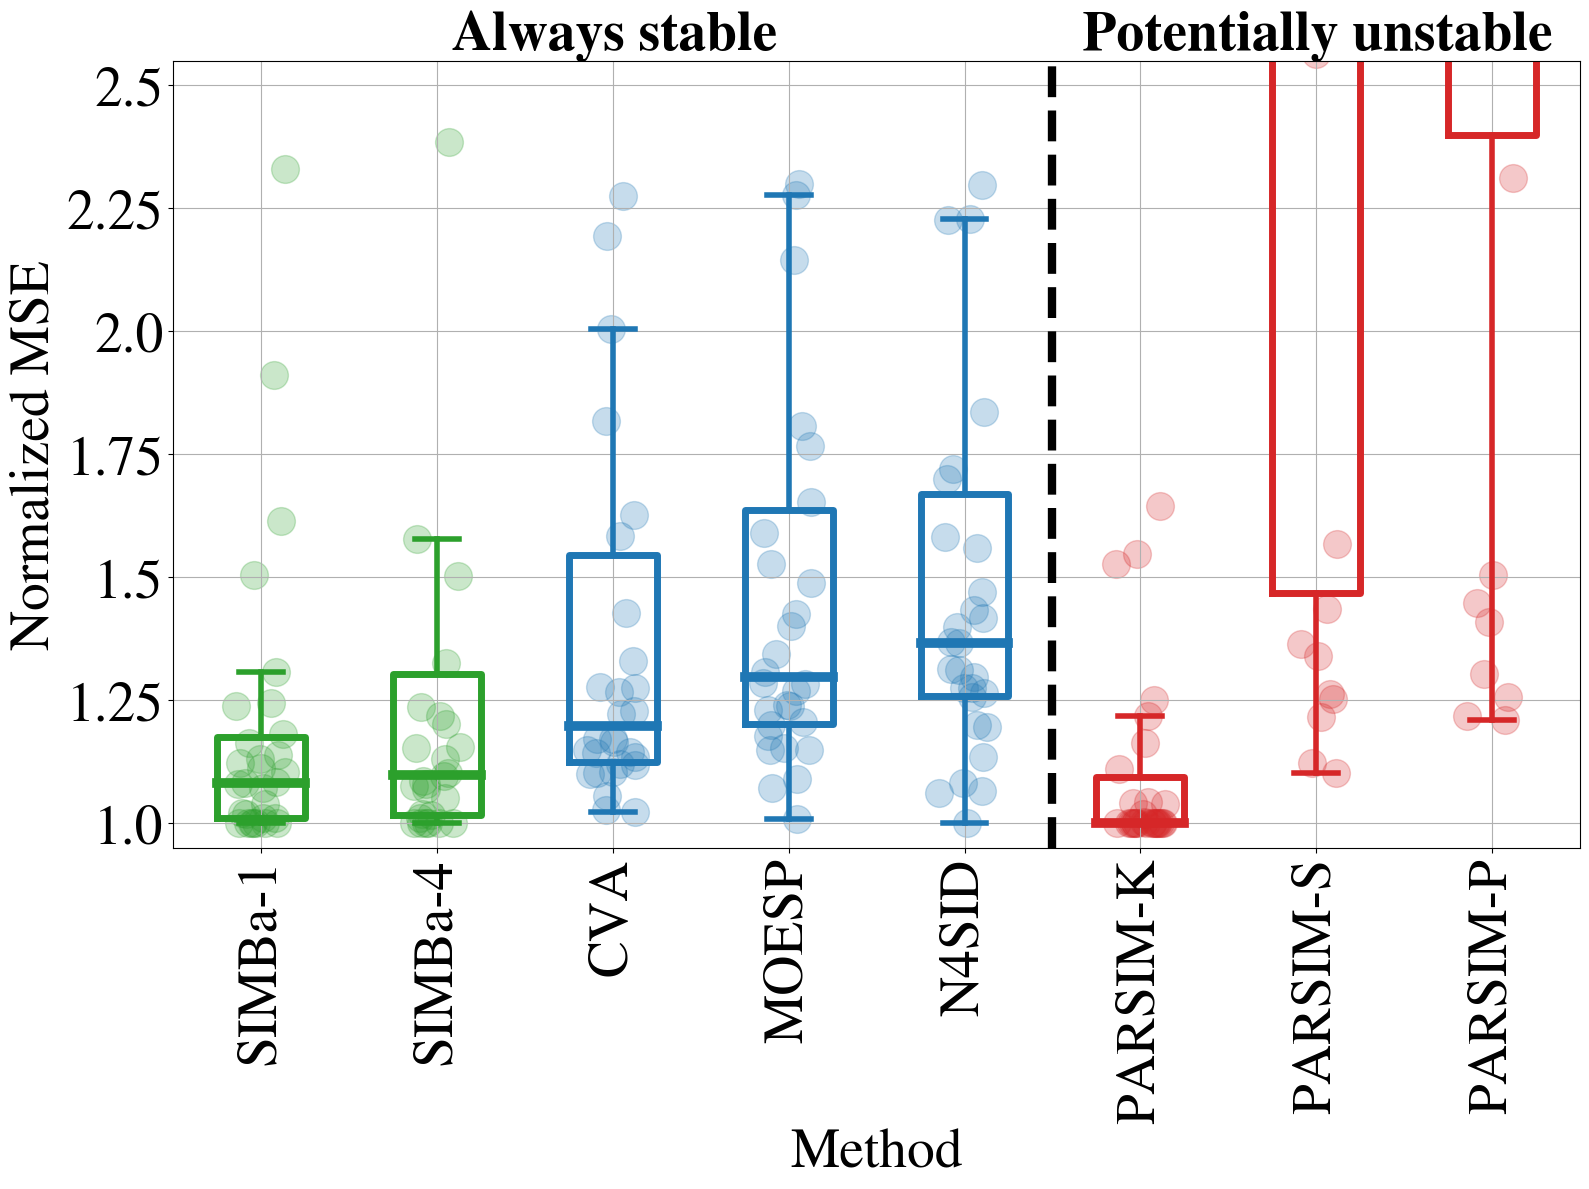

Method		&	Q1	&	Median	&	Q3
SIMBa-1		&	1.00	&	1.06	&	1.25	\\
SIMBa-4		&	1.07	&	1.21	&	1.34	\\
CVA		&	1.11	&	1.30	&	1.83	\\
MOESP		&	1.17	&	1.37	&	1.81	\\
N4SID		&	1.11	&	1.39	&	1.64	\\
PARSIM-K	&	1.00	&	1.00	&	1.16	\\
PARSIM-S	&	1.40	&	2.63	&	7.24	\\
PARSIM-P	&	1.76	&	3.93	&	132.63	\\


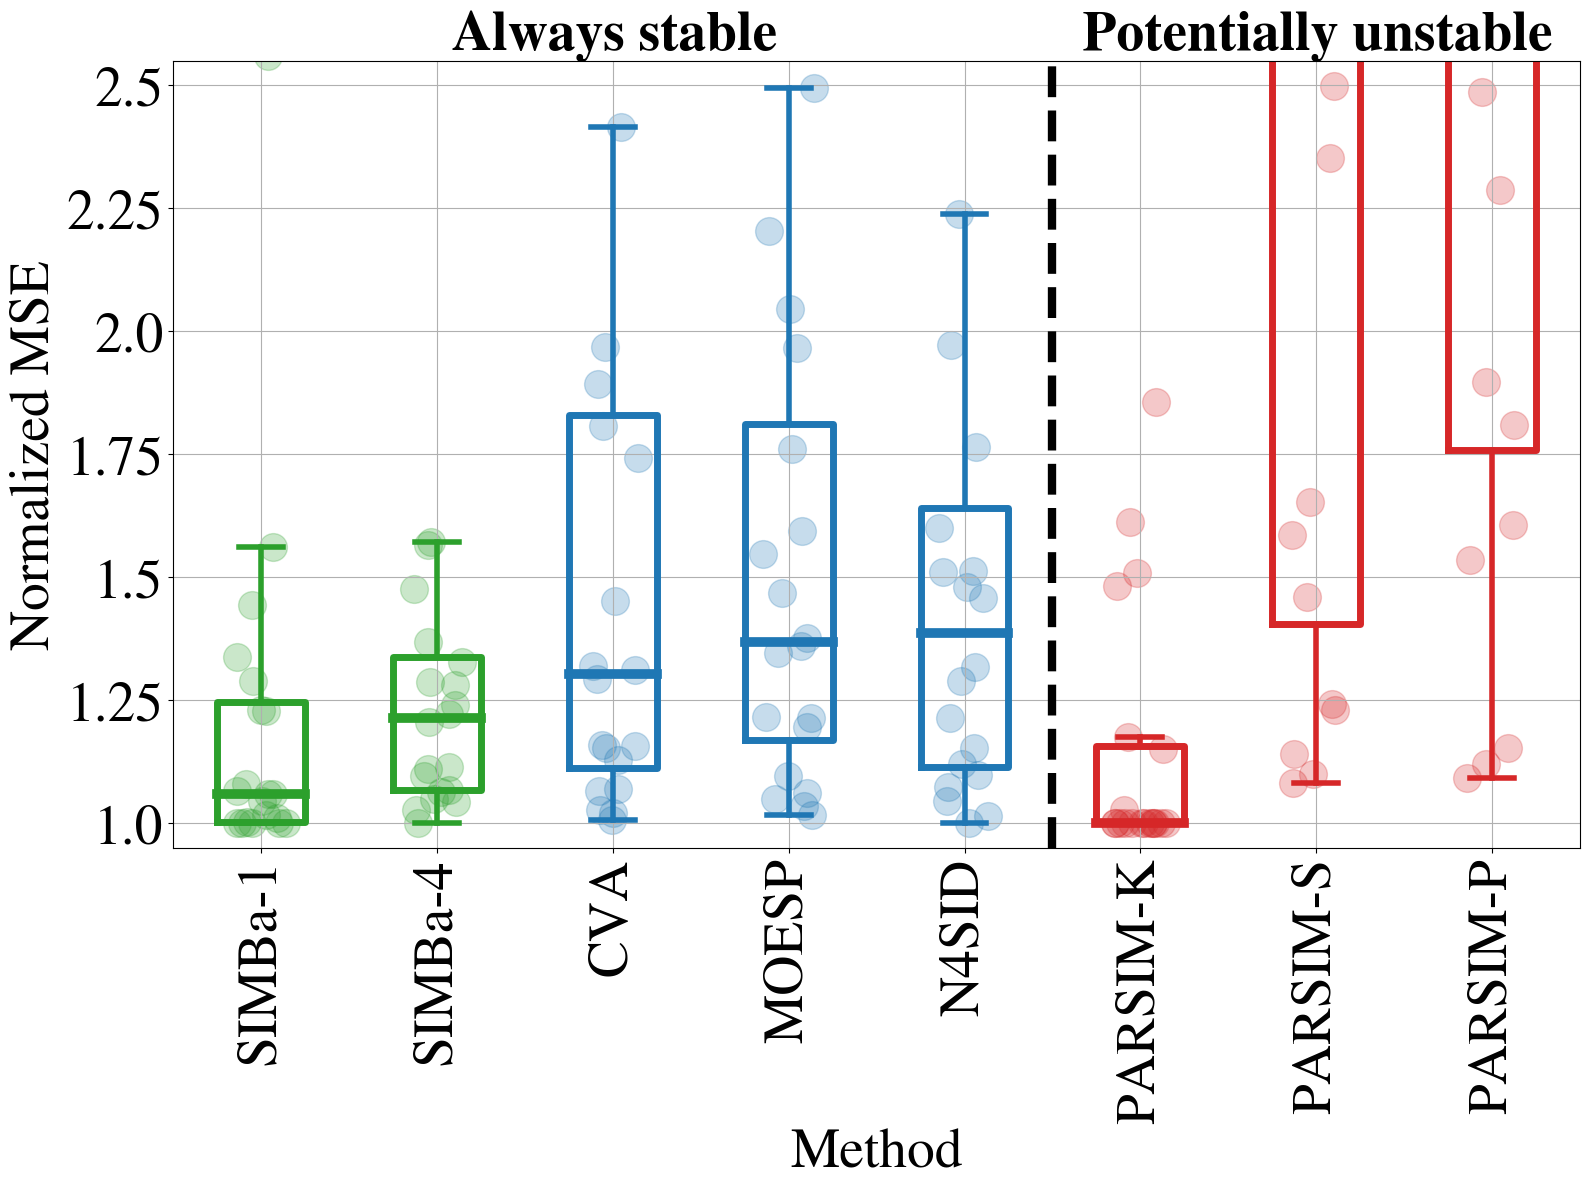

In [2]:
directory = 'saves'
seeds = [1, 12, 123, 1234, 12345, 123456, 1234567, 12345678, 123456789, 1234567890]
all_names = ['Structure']
scale = 2

all_mses_val = []
all_mses_test = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for seed in seeds:
        mses_val = []
        mses_test = []
        for i in range(3):
            path = os.path.join(f'Random_naive_{seed}', f'Results_{i}')
            names, times, train_ids, validation_ids, test_ids, data, sim_params, data_params = load_results(directory, path)
            mses_val_ = [np.mean((validation_id - data[7])**2) for validation_id in validation_ids]
            mses_test_ = [np.mean((test_id - data[8])**2) for test_id in test_ids]
            mses_val.append(mses_val_)
            mses_test.append(mses_test_)
        all_mses_val.append(np.array(mses_val).T)
        all_mses_test.append(np.array(mses_test).T)
names = names[:-2] + ['SIMBa-1', 'SIMBa-4']
plot_random(names, all_mses_test, savename='random_naive', ylim=2.5)

all_mses_val = []
all_mses_test = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for seed in seeds:
        mses_val = []
        mses_test = []
        for i in range(2):
            path = os.path.join(f'Random_naive_norm_{seed}', f'Results_{i}')
            names, times, train_ids, validation_ids, test_ids, data, sim_params, data_params = load_results(directory, path)
            mses_val_ = [np.mean((validation_id - data[7])**2) for validation_id in validation_ids]
            mses_test_ = [np.mean((test_id - data[8])**2) for test_id in test_ids]
            mses_val.append(mses_val_)
            mses_test.append(mses_test_)
        all_mses_val.append(np.array(mses_val).T)
        all_mses_test.append(np.array(mses_test).T)
        
names = names[:-2] + ['SIMBa-1', 'SIMBa-4']
plot_random(names, all_mses_test, savename='random_naive_norm', ylim=2.5)

Method		&	Q1	&	Median	&	Q3
SIMBa_DCB	&	1.00	&	1.00	&	1.01	\\
SIMBa_mD	&	1.02	&	1.03	&	1.10	\\
SIMBa_DC	&	1.02	&	1.03	&	1.07	\\
SIMBa_DmC	&	1.02	&	1.04	&	1.08	\\
SIMBa		&	1.03	&	1.06	&	1.12	\\
SIMBa_DCmB	&	1.02	&	1.14	&	1.43	\\
CVA		&	1.34	&	1.47	&	1.79	\\
MOESP		&	1.40	&	1.72	&	1.99	\\
N4SID		&	1.46	&	1.80	&	2.14	\\
SIMBa_DCBmA	&	1.41	&	4.09	&	10.34	\\
PARSIM-K	&	1.07	&	1.10	&	1.17	\\
PARSIM-P	&	1.58	&	1.90	&	3.16	\\
PARSIM-S	&	1.54	&	2.01	&	3.16	\\


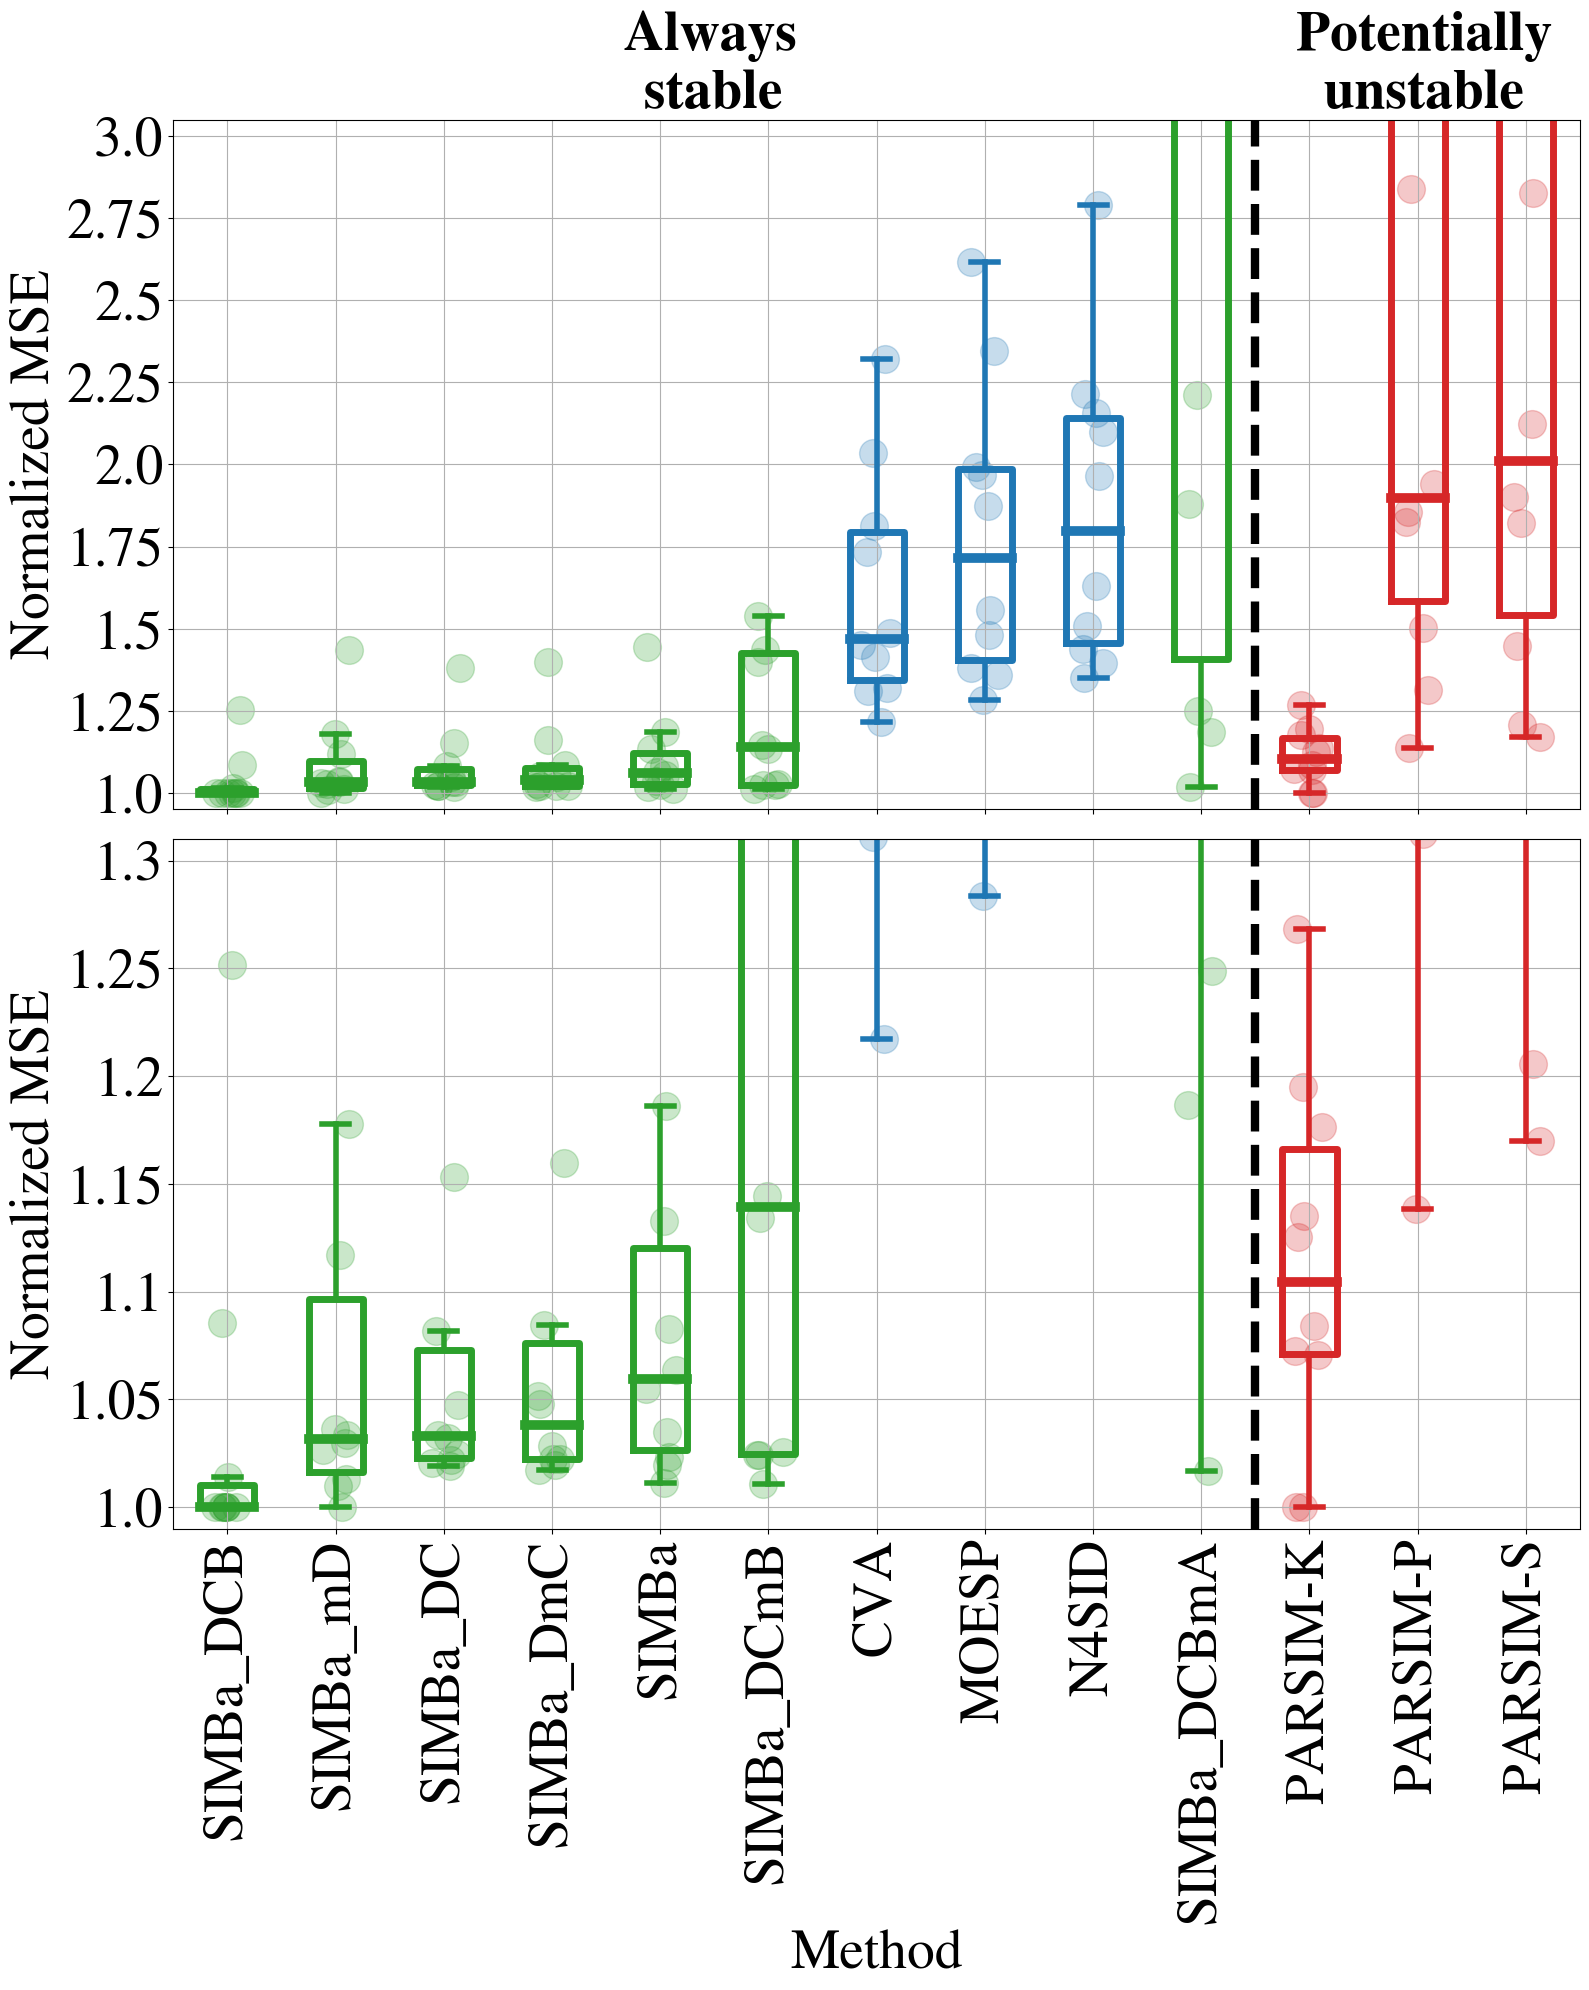

In [3]:
directory = 'saves'
seeds = [1, 12, 123, 1234, 12345, 123456, 1234567, 12345678, 123456789, 1234567890]
all_names = ['Structure']
scale = 2

all_mses_val = []
all_mses_test = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for name in all_names:
        mses_val = []
        mses_test = []
        for seed in seeds:
            path = os.path.join(f'{name}_{seed}', 'Results')
            names, times, train_ids, validation_ids, test_ids, data, sim_params, data_params = load_results(directory, path)
            mses_val_ = [np.mean((validation_id - data[7])**2) for validation_id in validation_ids]
            mses_test_ = [np.mean((test_id - data[8])**2) for test_id in test_ids]
            
            path = os.path.join(f'{name}_{seed}', 'Results-mat')
            _, _, train_ids, validation_ids, test_ids, data, sim_params, data_params = load_results(directory, path)
            names += ['mat-ARX', 'mat-N4SID', 'mat-PEM']
            mses_val_ += [np.mean((validation_id - data[7])**2) for validation_id in validation_ids[-3:]]
            mses_test_ += [np.mean((test_id - data[8])**2) for test_id in test_ids[-3:]]

            mses_val.append(mses_val_)
            mses_test.append(mses_test_)

        all_mses_val.append(np.array(mses_val).T)
        all_mses_test.append(np.array(mses_test).T)

names = ['ARMAX-ILLS',
 'ARMAX-RLLS',
 'ARX-ILLS',
 'ARX-RLLS',
 'OE-ILLS',
 'N4SID',
 'MOESP',
 'CVA',
 'PARSIM-K',
 'PARSIM-S',
 'PARSIM-P',
 'SIMBa',
 'SIMBa_mD',
 'SIMBa_DmC',
 'SIMBa_DC',
 'SIMBa_DCmB',
 'SIMBa_DCB',
 'SIMBa_DCBmA',
 'mat-ARX',
 'mat-N4SID',
 'mat-PEM']

plot_random(names, all_mses_test, savename='structure', ylim=[3, 1.3], grid=[0.25, 0.05])

Method		&	Q1	&	Median	&	Q3
SIMBa-4		&	1.00	&	1.00	&	1.00	\\
CVA		&	1.32	&	1.49	&	1.84	\\
MOESP		&	1.47	&	1.90	&	2.04	\\
N4SID		&	1.51	&	2.04	&	2.21	\\
SIMBa-3		&	1.22	&	5.18	&	11.43	\\
PARSIM-K	&	1.10	&	1.12	&	1.17	\\
PARSIM-P	&	1.85	&	1.99	&	3.10	\\
PARSIM-S	&	1.82	&	2.15	&	3.10	\\


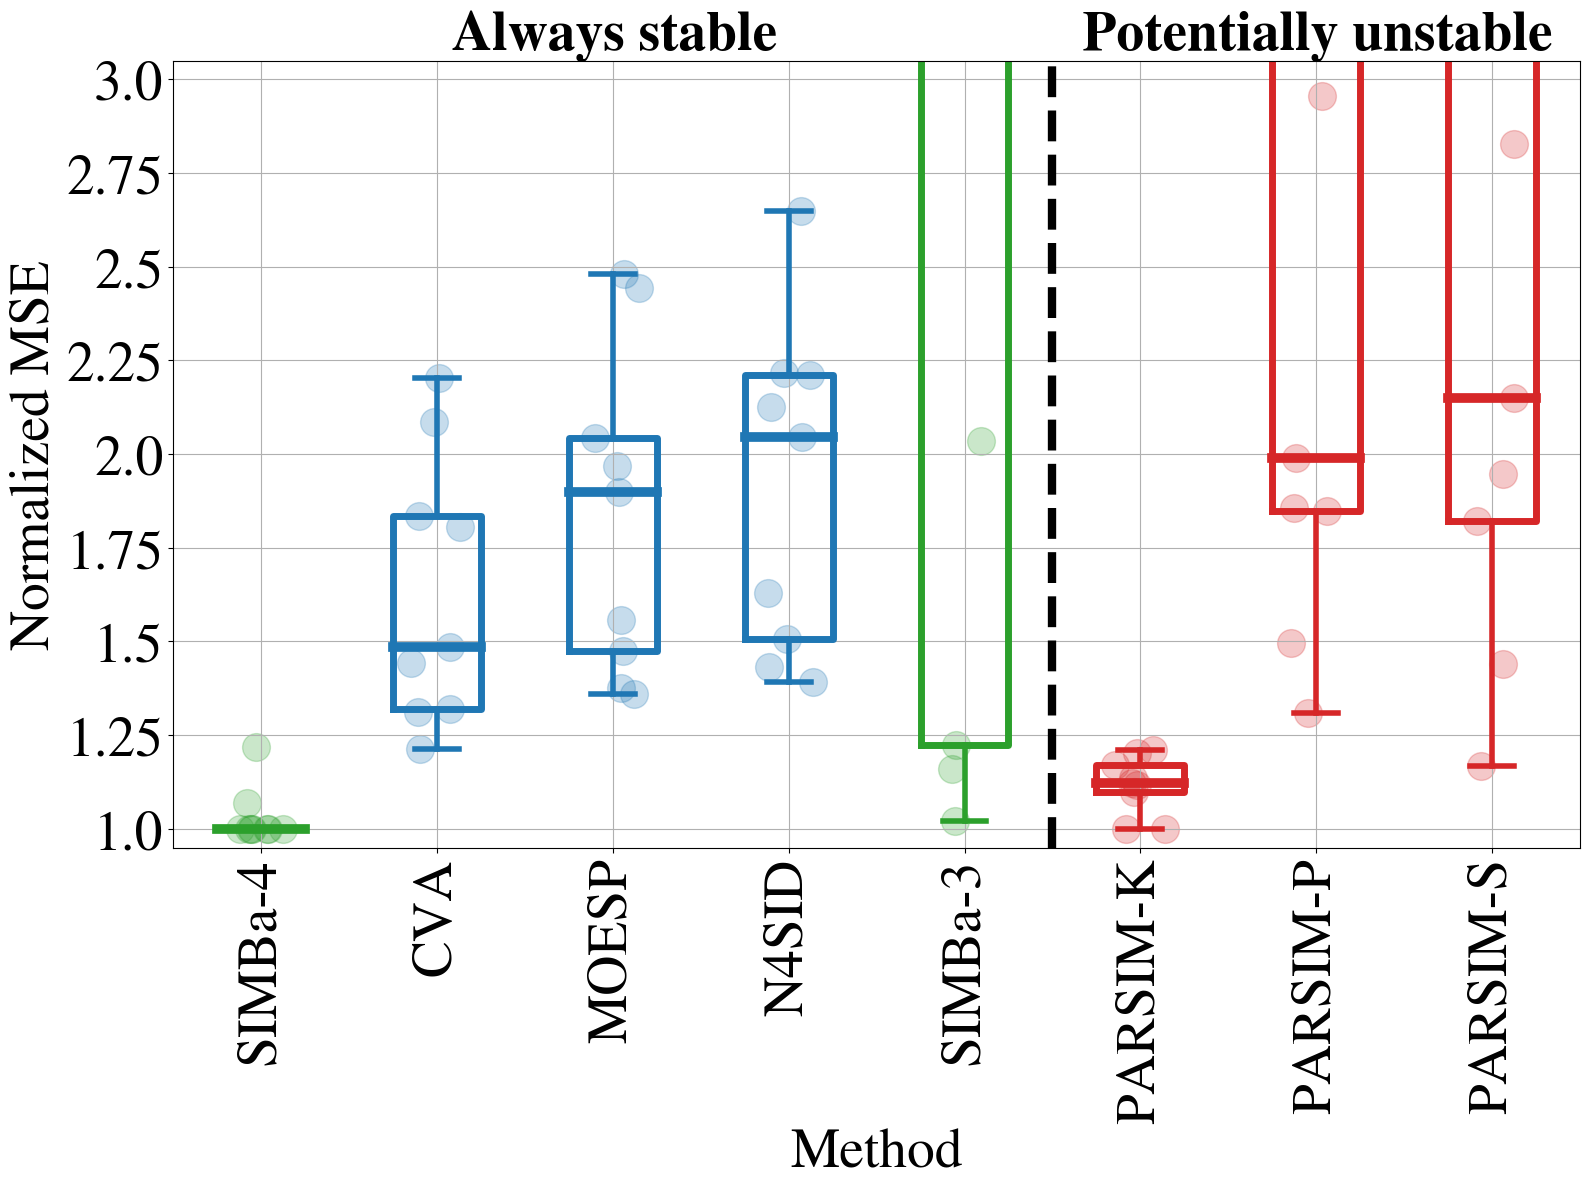

Method		&	Q1	&	Median	&	Q3
SIMBa-4		&	$1.00$	&	$1.02$	&	$1.30$	\\
CVA		&	$1.32$	&	$1.49$	&	$1.84$	\\
MOESP		&	$1.47$	&	$1.90$	&	$2.04$	\\
N4SID		&	$1.51$	&	$2.04$	&	$2.21$	\\
SIMBa-3		&	$1.22$	&	$5.22$	&	$11.55$	\\
PARSIM-K	&	$1.10$	&	$1.12$	&	$1.17$	\\
PARSIM-P	&	$1.85$	&	$1.99$	&	$3.10$	\\
PARSIM-S	&	$1.82$	&	$2.15$	&	$3.10$	\\


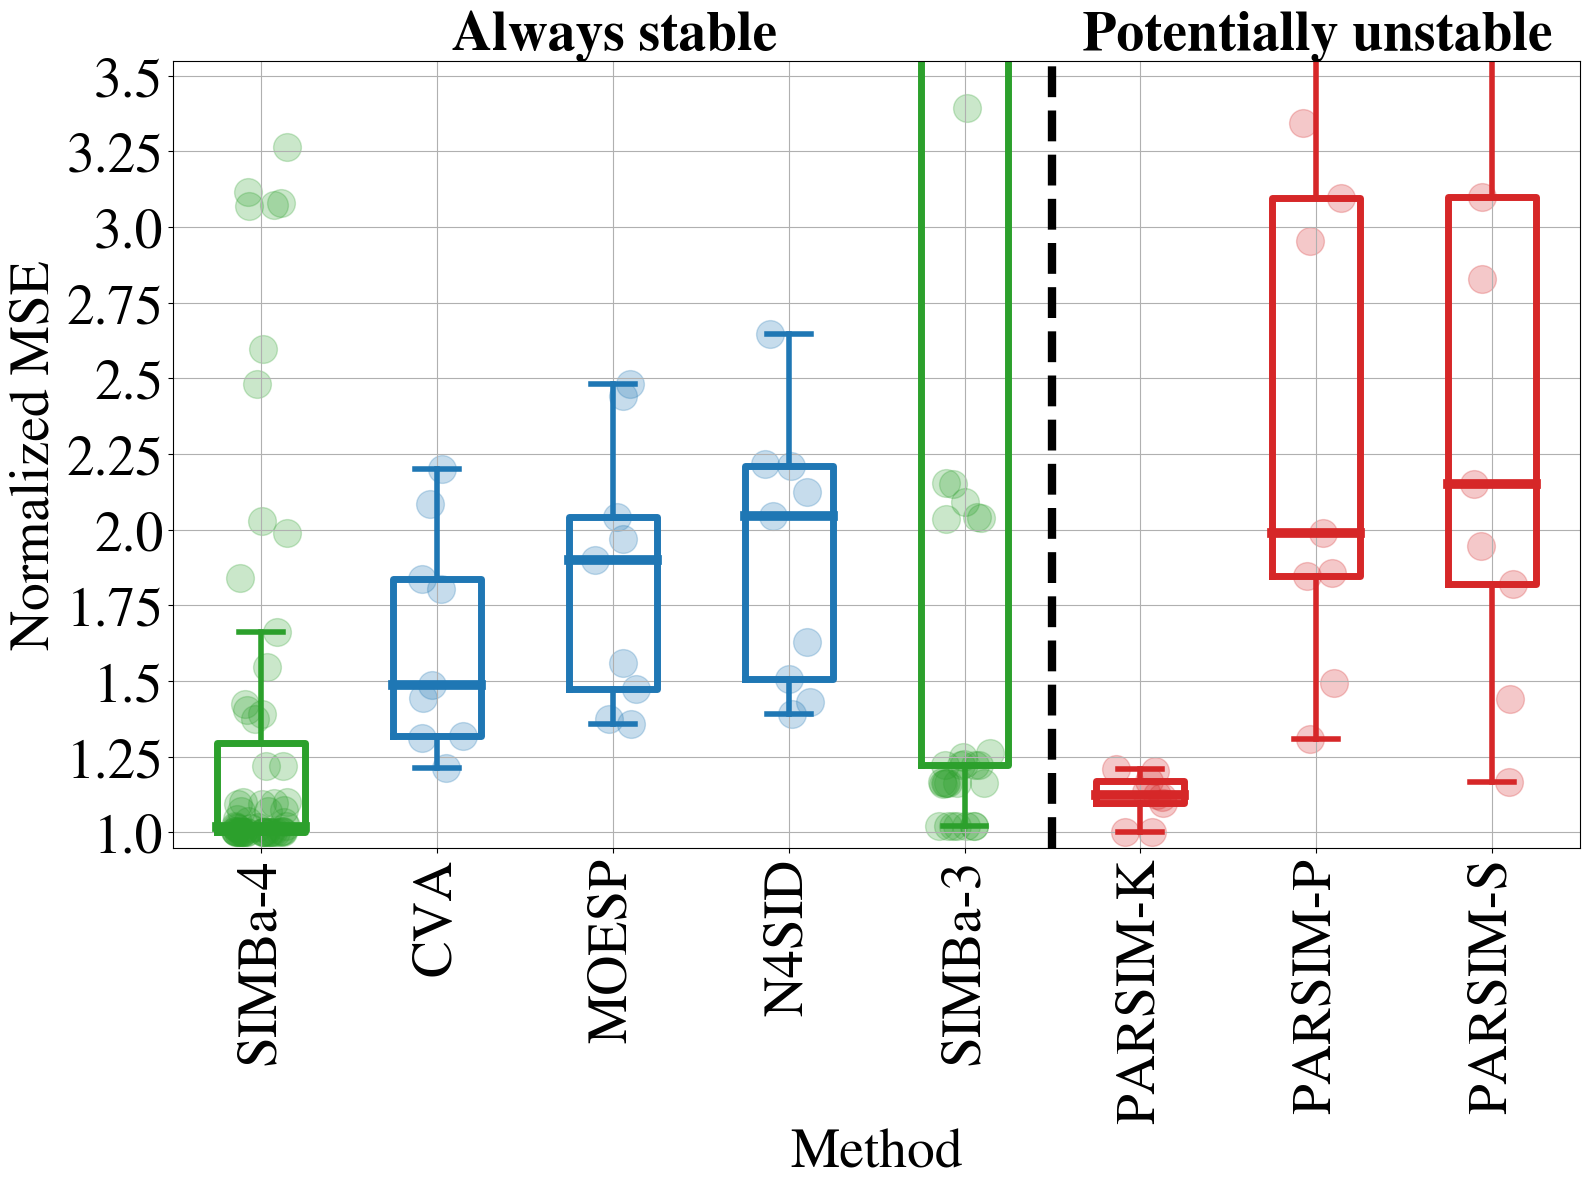

In [4]:
directory = 'saves'
seeds = [1, 12, 123, 1234, 12345, 1234567, 12345678, 123456789, 1234567890]
all_names = ['Mask', 'Mask_naive']
scale = 2
cutoff = 18

mses_val = []
mses_test = []
for seed in seeds:
    path = os.path.join(f'Mask_{seed}', f'Results')
    names, times, train_ids, validation_ids, test_ids, data, sim_params, data_params = load_results(directory, path)
    mses_val_ = [np.mean((validation_id - data[7])**2) for validation_id in validation_ids][:cutoff]
    mses_test_ = [np.mean((test_id - data[8])**2) for test_id in test_ids][:cutoff]
    mses_val_2 = mses_val_[:11] 
    mses_val_2.append(mses_val_[11:])
    mses_test_2 = mses_test_[:11]
    mses_test_2.append([mses_test_[11:]])

    path = os.path.join(f'Mask_naive_{seed}', f'Results')
    names, times_, train_ids, validation_ids, test_ids, data, sim_params, data_params = load_results(directory, path)
    mses_val_2.append([np.mean((validation_id - data[7])**2) for validation_id in validation_ids][11:cutoff])
    mses_test_2.append([np.mean((test_id - data[8])**2) for test_id in test_ids][11:cutoff])

    mses_val.append(mses_val_2)
    mses_test.append(mses_test_2)
    names = names[:11] + ['SIMBa-3', 'SIMBa-4']
    
mses = mses_test
all_mses_test = []
all_mses_test_min = []
for y in mses:
    l = []
    l_min = []
    for x in y:
        if isinstance(x, list):
            l.append(np.nanmedian(x))
            l_min.append(np.nanmin(x))
        else:
            l.append(x)
            l_min.append(x)
    all_mses_test.append(l)
    all_mses_test_min.append(l_min)

mses = [all_mses_test_min]
plot_random(names, mses, savename='mask')

plot_erros_many(names, mses_test, ylim=[3.5], grid=[0.25], savename='mask_all')

Computing stable [A, B] solution using SUB ... 
Validation:
  LS  error: 4.93e-01
  SUB error: 2.35e-01
Computing stable [A, B] solution using SUB ... 
Validation:
  LS  error: 2.46e-01
  SUB error: 2.36e-01
Computing stable [A, B] solution using SUB ... 
Validation:
  LS  error: 2.16e-01
  SUB error: 2.16e-01
Computing stable [A, B] solution using SUB ... 
Validation:
  LS  error: 1.35e-01
  SUB error: 1.35e-01
Computing stable [A, B] solution using SUB ... 
Validation:
  LS  error: 2.18e-02
  SUB error: 2.60e-02
Computing stable [A, B] solution using SUB ... 
Validation:
  LS  error: 3.86e-02
  SUB error: 3.89e-02
Nx	&	Min	&	Q1	&	Median	&	Q3
SIMBa_i
[4]	&	$0.05$	&	$0.07$	&	$0.07$	&	$0.09$	\\
[3,4]	&	$0.01$	&	$0.02$	&	$0.04$	&	$0.05$	\\
[3,4,5]	&	$0.00$	&	$0.01$	&	$0.02$	&	$0.03$	\\
[2,3,4,5]	&	$0.00$	&	$0.01$	&	$0.01$	&	$0.01$	\\
[2,3,4,5,6]	&	$0.00$	&	$0.00$	&	$0.00$	&	$0.00$	\\
[1,2,3,4,5,6]	&	$0.00$	&	$0.00$	&	$0.00$	&	$0.00$	\\
SIMBa
[4]	&	$0.02$	&	$0.02$	&	$0.02$	&	$0.02$	\\
[3,

/Users/loris/Documents/SimbaUse/simba/plots.py:316: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=20*scale)


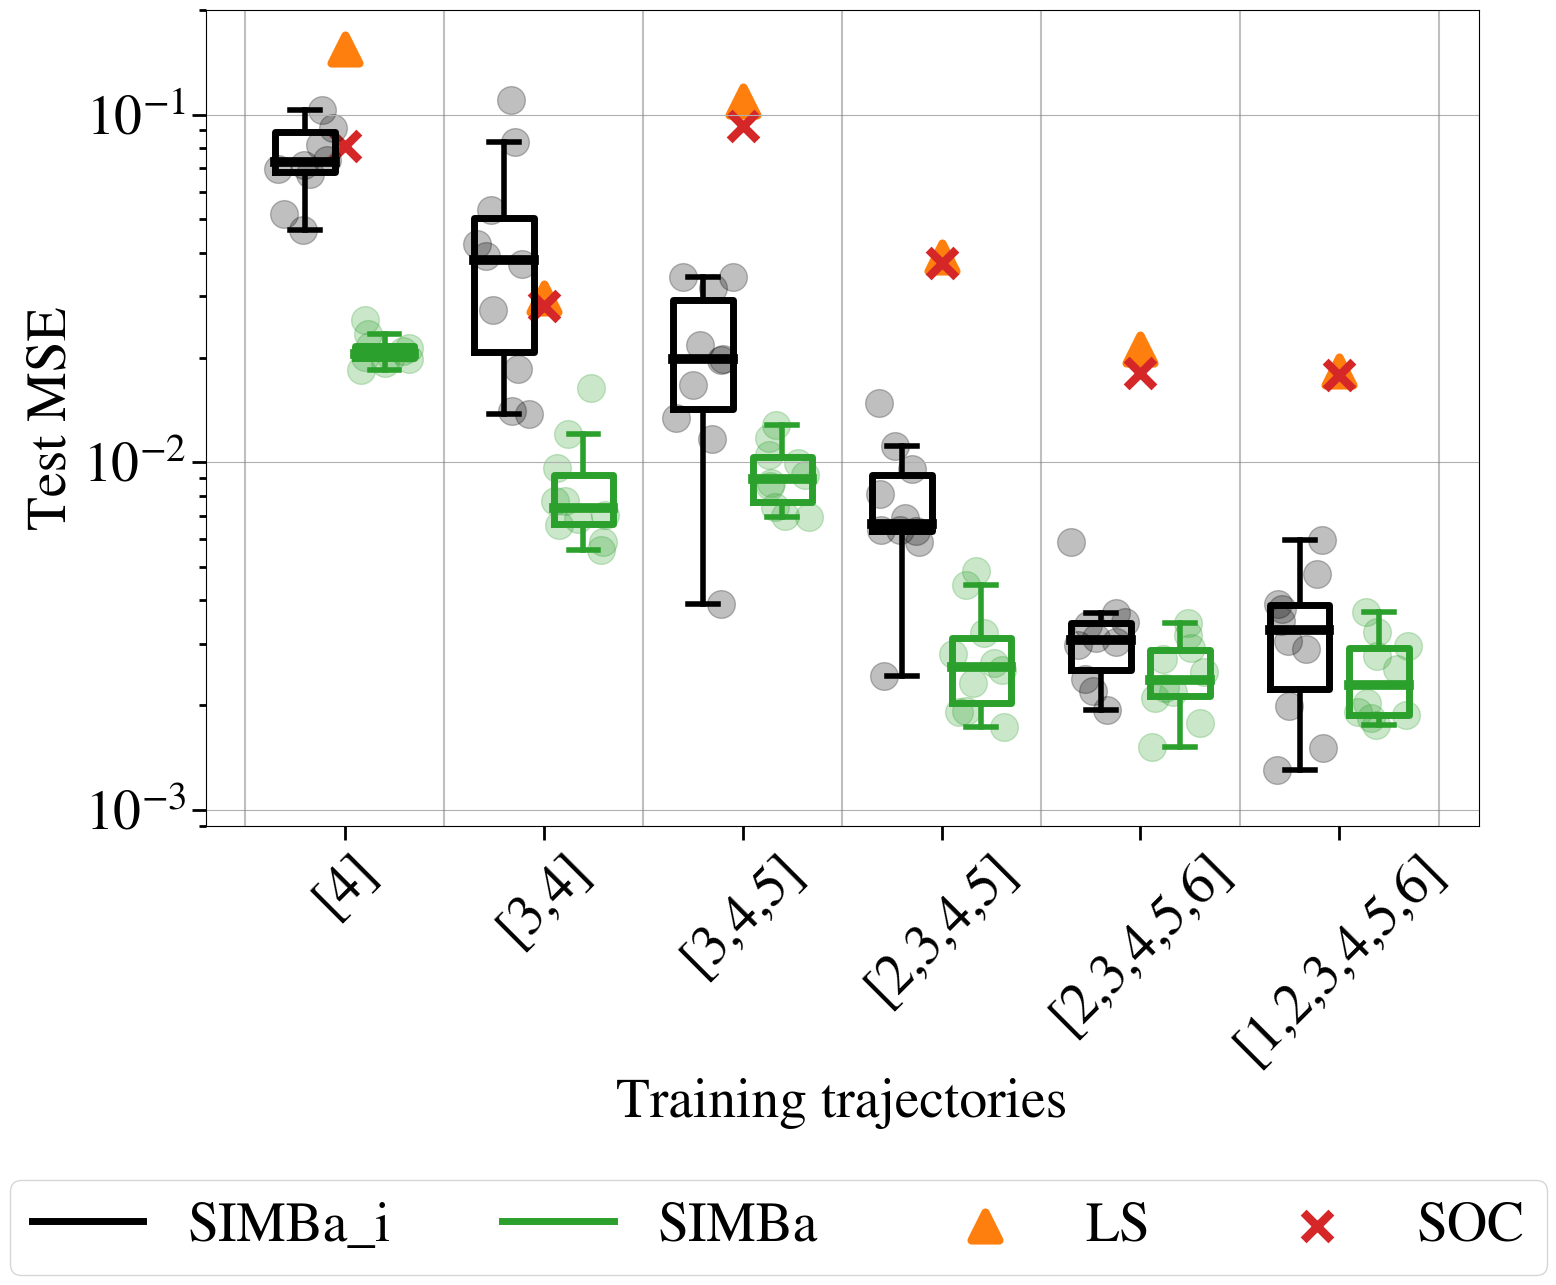

Nx	&	Q1	&	Median	&	Q3
SIMBa_i
[4]	&	$-9.58$	&	$10.18$	&	$16.06$	\\
[3,4]	&	$-78.59$	&	$-35.03$	&	$26.45$	\\
[3,4,5]	&	$68.55$	&	$78.68$	&	$84.69$	\\
[2,3,4,5]	&	$75.48$	&	$82.26$	&	$83.05$	\\
[2,3,4,5,6]	&	$80.94$	&	$82.92$	&	$86.02$	\\
[1,2,3,4,5,6]	&	$78.23$	&	$81.61$	&	$87.55$	\\
SIMBa
[4]	&	$73.50$	&	$74.74$	&	$75.51$	\\
[3,4]	&	$67.53$	&	$73.78$	&	$76.42$	\\
[3,4,5]	&	$88.84$	&	$90.35$	&	$91.71$	\\
[2,3,4,5]	&	$91.68$	&	$93.12$	&	$94.60$	\\
[2,3,4,5,6]	&	$84.08$	&	$86.89$	&	$88.25$	\\
[1,2,3,4,5,6]	&	$83.66$	&	$87.20$	&	$89.47$	\\


/Users/loris/Documents/SimbaUse/simba/plots.py:371: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(x) for x in ax.get_yticks()], size=20*scale)


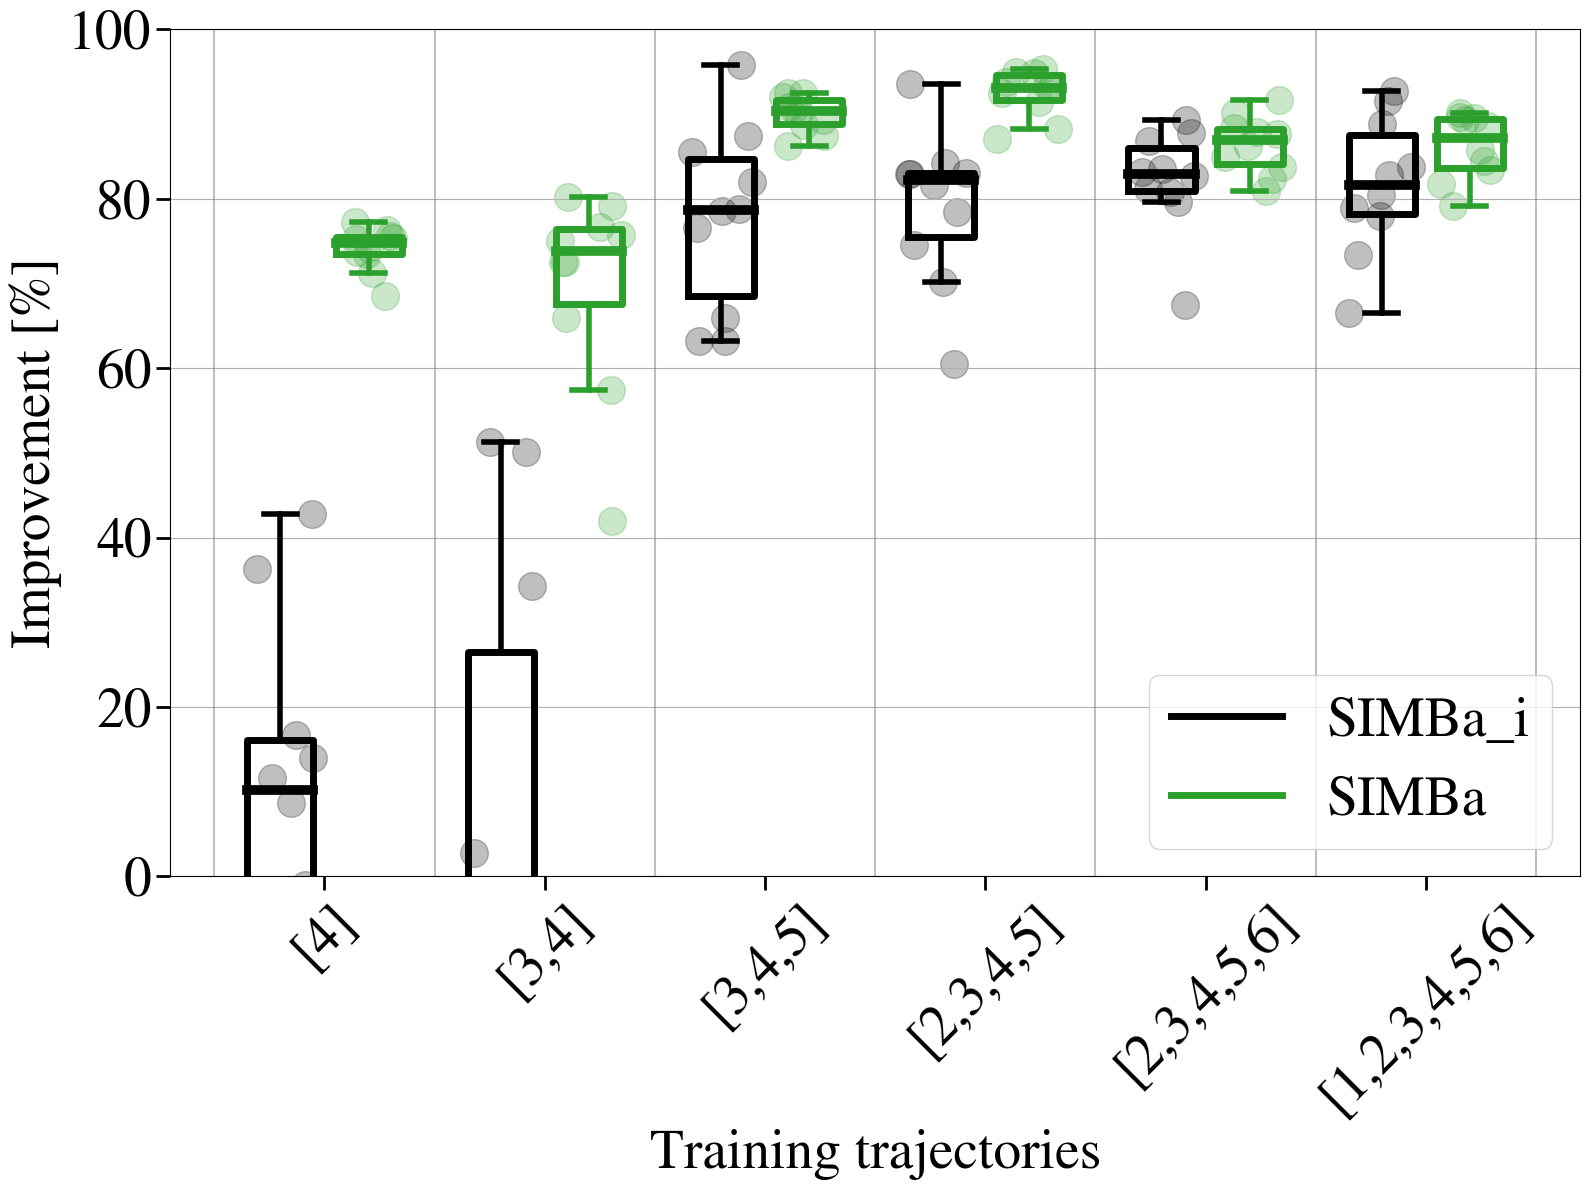

In [5]:
directory = 'saves'
seed = 1234
trajs = ['3', '23', '234', '1234', '12345', '012345']
lim = 10
nu = 7
nx = 17
ny = 17
H = 399
path_to_matlab = 'mat'

scale = 2

eng = matlab.engine.start_matlab()
if path_to_matlab is not None:
    eng.cd(path_to_matlab, nargout=0)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    mses_val = []
    mses_test = []
    for traj in trajs:
        path = os.path.join(f'Franka_{seed}_{traj}', 'Results')
        names, times, train_ids, validation_ids, test_ids, data, sim_params, data_params = load_results(directory, path)

        # Run Unconstrained LS for reference
        U = data[0].reshape(-1, data[0].shape[-1])[:-1,:]
        X = data[3].reshape(-1, data[3].shape[-1])[:-1,:]
        Y = data[3].reshape(-1, data[3].shape[-1])[1:,:]

        AB_ls = Y.T @ np.linalg.pinv(np.concatenate([X.T, U.T], axis=0))

        A_ls = AB_ls[:,:nx]
        B_ls = AB_ls[:,nx:]

        U_val = data[1]
        U_test = data[2]
        X_val = data[4]
        X_test = data[5]

        U, U_val, U_test, X, X_val, X_test, Y, Y_val, Y_test, x0, x0_val, x0_test = check_and_initialize_data(U,U_val=U_val, U_test=U_test, X=X, X_val=X_val, X_test=X_test,
                                                                 verbose=0, autonomous=False, 
                                                                 input_output=False, device='cpu')
        
        A_ls = torch.tensor(A_ls, dtype=torch.float64, device='cpu')
        B_ls = torch.tensor(B_ls, dtype=torch.float64, device='cpu')

        ls_val = evaluate(A_ls, B_ls, U_val, X_val, noise=None, name='', print_trajs=False, return_mean=True)
        ls_test = evaluate(A_ls, B_ls, U_test, X_test, noise=None, name='', print_trajs=False, return_mean=True)
        X_val = X_val.squeeze().detach().numpy()
        X_test = X_test.squeeze().detach().numpy()

        mses_val.append([ls_val]+[np.mean((validation_id - X_val)**2) for validation_id in validation_ids][-10:])
        mses_test.append([ls_test]+[np.mean((test_id - X_test)**2) for test_id in test_ids][-10:])

    mses_val_init = []
    mses_test_init = []
    for traj in trajs:
        path = os.path.join(f'Franka_init_{seed}_{traj}', 'Results')
        names, times, train_ids, validation_ids, test_ids, data, sim_params, data_params = load_results(directory, path)

        # Run Unconstrained LS for reference
        U = data[0].reshape(-1, data[0].shape[-1])[:-1,:]
        X = data[3].reshape(-1, data[3].shape[-1])[:-1,:]
        Y = data[3].reshape(-1, data[3].shape[-1])[1:,:]
        U_val = data[1]
        U_test = data[2]
        X_val = data[4]
        X_test = data[5]

        U, U_val, U_test, X, X_val, X_test, Y, Y_val, Y_test, x0, x0_val, x0_test = check_and_initialize_data(U,U_val=U_val, U_test=U_test, X=X, X_val=X_val, X_test=X_test,
                                                                 verbose=0, autonomous=False, 
                                                                 input_output=False, device='cpu')

        _, _, A_sub, B_sub = matlab_sub(eng, U, U_val, U_test, X, X_val, X_test)

        sub_val = evaluate(A_sub, B_sub, U_val, X_val, noise=None, name='', print_trajs=False, return_mean=True)
        sub_test = evaluate(A_sub, B_sub, U_test, X_test, noise=None, name='', print_trajs=False, return_mean=True)
        X_val = X_val.squeeze().detach().numpy()
        X_test = X_test.squeeze().detach().numpy()

        mses_val_init.append([sub_val]+[np.mean((validation_id - X_val)**2) for validation_id in validation_ids][-10:])
        mses_test_init.append([sub_test]+[np.mean((test_id - X_test)**2) for test_id in test_ids][-10:])
    
    trajs_ = []
    for traj in trajs:
        s = '['
        for c in traj:
            s += f'{str(int(c)+1)},'
        s = s[:-1] + ']'
        trajs_.append(s)
    trajs_

eng.quit()

plot_franka(mses_init=mses_test_init, mses=mses_test, trajs_=trajs_, savename='franka')
plot_franka_boxplots(mses_init=mses_test_init, mses=mses_test, trajs_=trajs_, savename='franka_improvement')

Nx	&	Q1	&	Median	&	Q3
SIMBa_i
[4]	&	1348.20	&	$1351.33	&	1356.08	\\
[1346.51823705 1335.52848639 1351.66745667 1347.58596794 1356.84006561
 1356.18083647 1355.78069617 1356.98831029 1350.99334808 1350.03118255]
[3,4]	&	1804.49	&	$1807.97	&	1811.88	\\
[1798.82614018 1806.48544526 1807.39387779 1795.20358723 1808.83696687
 1818.60235565 1815.89347957 1812.89370765 1808.5416161  1803.82345055]
[3,4,5]	&	2260.06	&	$2262.78	&	2267.05	\\
[2264.44102255 2261.76237492 2257.03177766 2258.47873017 2274.60824979
 2260.9919484  2263.79361333 2267.92591802 2259.74677776 2273.31266925]
[2,3,4,5]	&	2713.50	&	$2718.03	&	2720.62	\\
[2718.53169825 2717.52297281 2713.09986238 2701.09569958 2720.88843262
 2719.8318128  2725.22966952 2708.85020211 2714.71393617 2722.53966492]
[2,3,4,5,6]	&	3170.58	&	$3173.26	&	3179.66	\\
[3164.16833774 3170.149492   3168.65472429 3176.79432806 3193.28645589
 3172.53037377 3188.55805713 3171.86281645 3180.60885719 3173.99301981]
[1,2,3,4,5,6]	&	3631.75	&	$3640.21	&	3649.75	

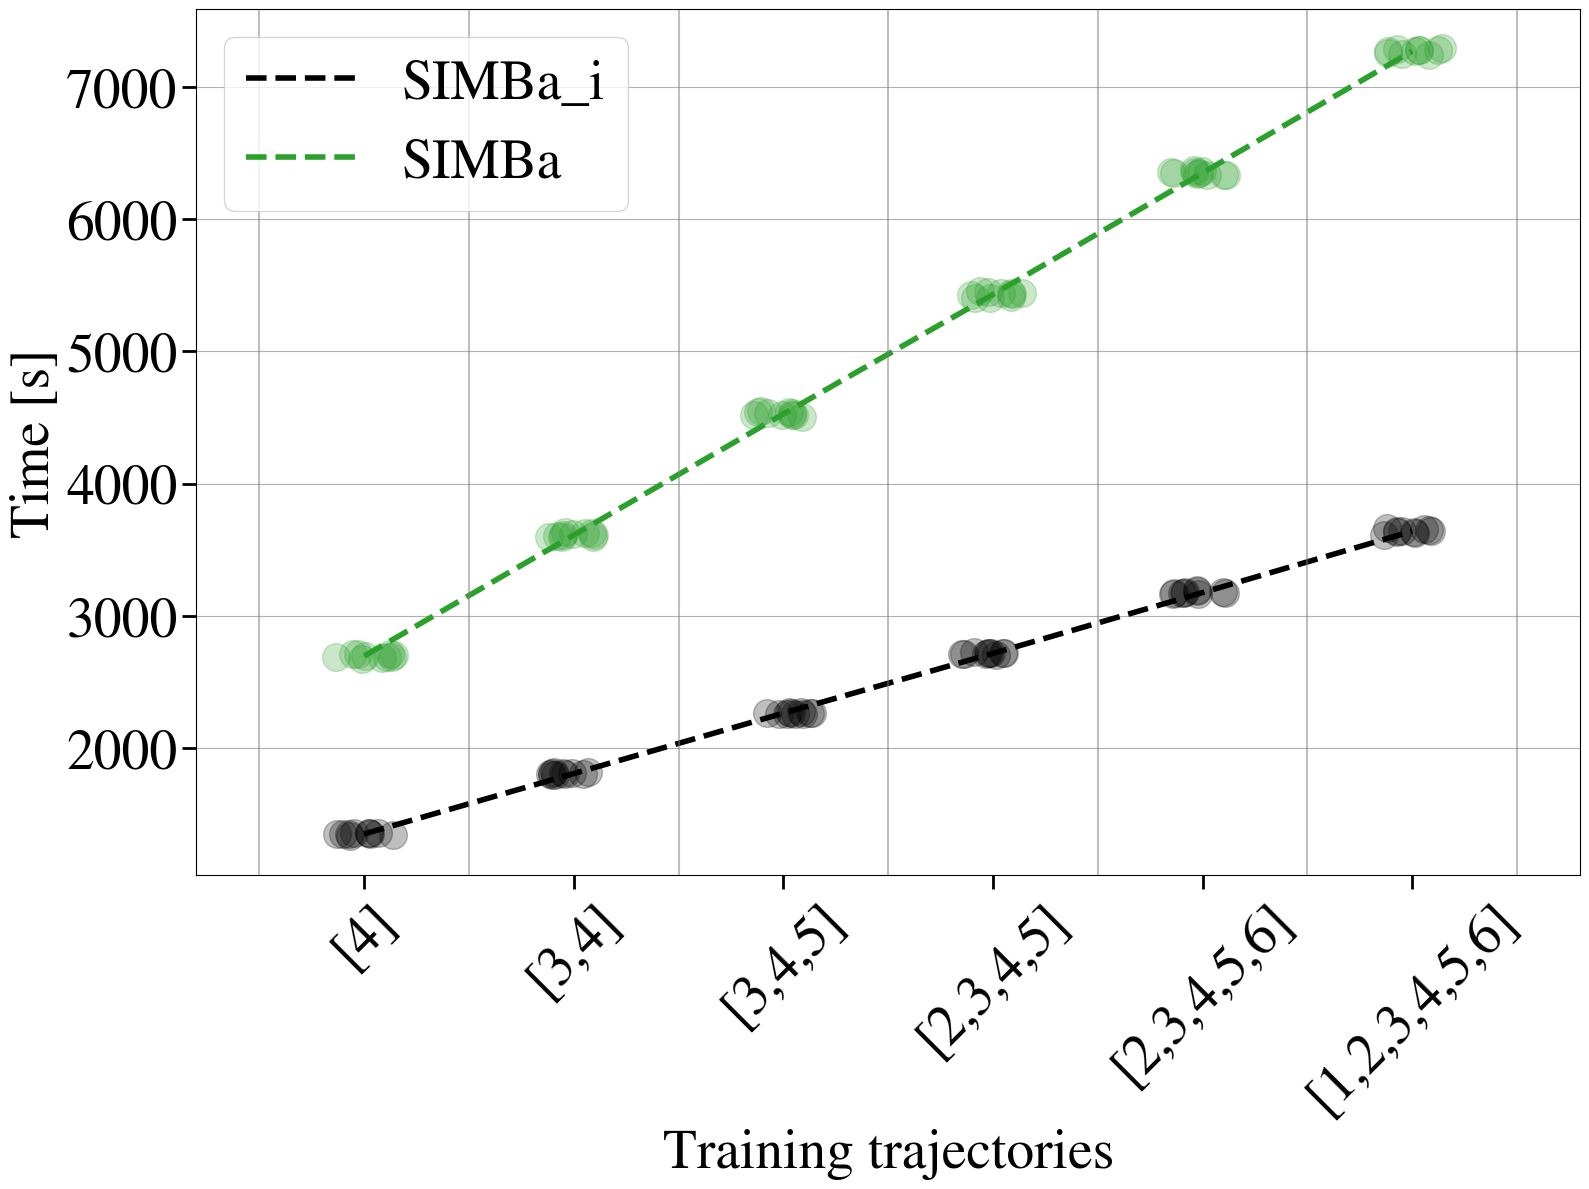

Nx	&	Q1	&	Median	&	Q3
SIMBa_i
[4]	&	$540.62$	&	$632.44$	&	$1009.71$	\\
[3,4]	&	$793.34$	&	$1568.24$	&	$1797.21$	\\
[3,4,5]	&	$557.31$	&	$2175.06$	&	$2249.18$	\\
[2,3,4,5]	&	$2701.00$	&	$2708.08$	&	$2714.68$	\\
[2,3,4,5,6]	&	$2871.26$	&	$3101.31$	&	$3140.18$	\\
[1,2,3,4,5,6]	&	$3008.84$	&	$3484.38$	&	$3588.02$	\\
SIMBa
[4]	&	$706.02$	&	$914.40$	&	$1377.55$	\\
[3,4]	&	$2467.21$	&	$3241.48$	&	$3365.90$	\\
[3,4,5]	&	$3997.98$	&	$4217.41$	&	$4410.82$	\\
[2,3,4,5]	&	$2551.35$	&	$2943.71$	&	$3085.52$	\\
[2,3,4,5,6]	&	$932.40$	&	$1968.54$	&	$5615.22$	\\
[1,2,3,4,5,6]	&	$903.22$	&	$1780.44$	&	$4927.66$	\\


/Users/loris/Documents/SimbaUse/simba/plots.py:478: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(x) for x in ax.get_yticks()], size=20*scale)


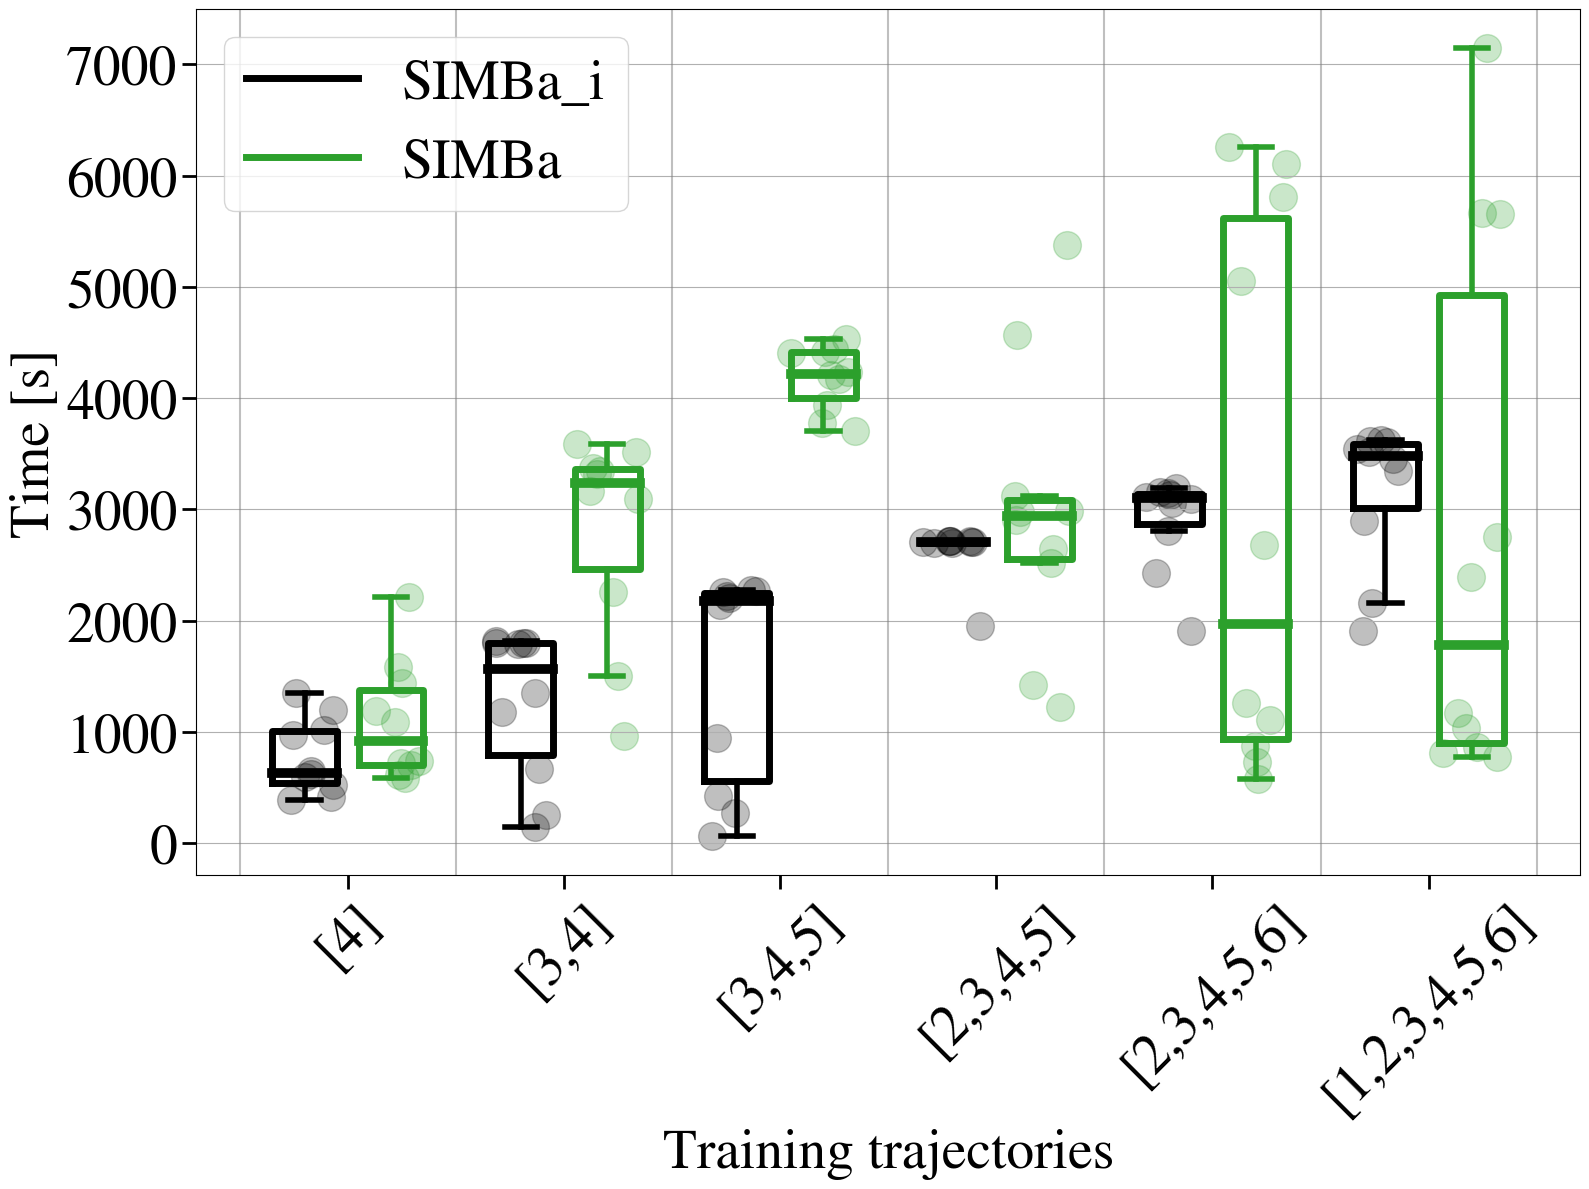

In [6]:
import pandas as pd
import numpy as np
from simba.model import Simba

scale = 2
directory = 'saves'
seed = 1234
trajs = ['3', '23', '234', '1234', '12345', '012345']
lim = 10
nu = 7
nx = 17
ny = 17
H = 399
path_to_matlab = 'mat'

scale = 2
parameters['input_output'] = False
parameters['id_D'] = False
parameters['max_eigenvalue'] = 1.0
parameters['horizon'] = 10
parameters['max_epochs'] = 40000
parameters['dropout'] = 0
parameters['init_from_matlab_or_ls'] = False
parameters['learn_x0'] = False
parameters['print_each'] = 2500

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    path = os.path.join(f'Franka_1234_3', f'Results')
    names, _, _, _, _, _, _, _ = load_results(directory, path)
    ts = pd.DataFrame(index=names, columns=[1,2,3,4,5,6])
    rts = pd.DataFrame(index=names[-10:], columns=[1,2,3,4,5,6])

    for i,traj in enumerate(trajs):
        path = os.path.join(f'Franka_{seed}_{traj}', 'Results')
        names, times, train_ids, validation_ids, test_ids, data, sim_params, data_params = load_results(directory, path)
        ts.iloc[:, i] = times
        simba = Simba(nx=nx, nu=nu, ny=ny, parameters=parameters)
        for j in range(10):
            simba.load(os.path.join(directory, f'Franka_{seed}_{traj}'), f'SIMBa_{j+1}')
            rts.iloc[j,i] = np.argmin(simba.val_losses) / 40000

    t = pd.DataFrame(index=[x[:6]+'i'+x[6:] for x in names[-10:]], columns=[1,2,3,4,5,6])
    rt = pd.DataFrame(index=[x[:6]+'i'+x[6:] for x in names[-10:]], columns=[1,2,3,4,5,6])
    parameters['init_from_matlab_or_ls'] = True
    parameters['max_epochs'] = 20000
    for i,traj in enumerate(trajs):
        path = os.path.join(f'Franka_init_{seed}_{traj}', 'Results')
        names, times, train_ids, validation_ids, test_ids, data, sim_params, data_params = load_results(directory, path)
        t.iloc[:,i] = times[-10:]
        for j in range(10):
            simba.load(os.path.join(directory, f'Franka_init_{seed}_{traj}'), f'SIMBa_{j+1}')
            rt.iloc[j,i] = np.argmin(simba.val_losses) / 20000
    ts = pd.concat([ts,t])
    rts = pd.concat([rts,rt])

    ts = ts.iloc[9:,:]
    rts = rts * ts

    trajs_ = []
    for traj in trajs:
        s = '['
        for c in traj:
            s += f'{str(int(c)+1)},'
        s = s[:-1] + ']'
        trajs_.append(s)
    trajs_

plot_times(ts, trajs_, savename='times', scale=2)
plot_times_boxplots(rts, trajs_, savename='real_times', scale=2)

In [7]:
directory = 'saves'
seeds = [1, 12, 123, 1234, 12345, 123456, 1234567, 12345678, 123456789, 1234567890]
all_names = ['Structure']
scale = 2

names = ['ARMAX-ILLS',
 'ARMAX-RLLS',
 'ARX-ILLS',
 'ARX-RLLS',
 'OE-ILLS',
 'N4SID',
 'MOESP',
 'CVA',
 'PARSIM-K',
 'PARSIM-S',
 'PARSIM-P',
 'SIMBa',
 'SIMBa_mD',
 'SIMBa_DmC',
 'SIMBa_DC',
 'SIMBa_DCmB',
 'SIMBa_DCB',
 'SIMBa_DCBmA',
 'mat-ARX',
 'mat-N4SID',
 'mat-PEM']

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for name in all_names:

        path = os.path.join(f'{name}_{seed}', 'Results')
        names, times, train_ids, validation_ids, test_ids, data, sim_params, data_params = load_results(directory, path)

        ts = pd.DataFrame(index=names, columns=[1,2,3,4,5,6,7,8,9,10])

        for i,seed in enumerate(seeds):
            path = os.path.join(f'{name}_{seed}', 'Results')
            names, times, train_ids, validation_ids, test_ids, data, sim_params, data_params = load_results(directory, path)
            ts.iloc[:, i] = times

        ts = ts.iloc[5:]
        display(ts)
        mean = ts.mean(axis=1)
        std = ts.std(axis=1)

        for i in range(len(mean)):
            if mean[i] < 10:
                print(f'{mean.index[i]}\t&\t{mean[i]:.2f}\t&\t{std[i]:.2f}\t\\\\')
            else:
                print(f'{mean.index[i]}\t&\t{int(mean[i])}\t&\t{int(std[i])}\t\\\\')



,1,2,3,4,5,6,7,8,9,10
N4SID,0.261414,0.238752,0.172765,0.219092,0.248023,0.294665,0.140605,0.198835,0.468516,0.268029
MOESP,0.349381,0.303044,0.453941,0.232777,0.224722,0.279507,0.233903,0.188545,0.576009,0.298499
CVA,0.694543,0.481803,0.305540,0.405515,0.520750,0.786640,0.418073,0.653021,0.777835,0.573490
PARSIM-K,1.305815,1.357778,1.303484,1.325972,1.368104,1.617532,1.599616,1.618777,1.658014,1.535132
PARSIM-S,0.893333,1.023549,1.091620,1.008104,1.002640,1.003432,1.360077,1.234427,1.379202,1.086631
PARSIM-P,7.405996,3.860730,10.590421,5.887455,15.111966,5.117112,5.706058,8.180446,8.376141,8.474591
SIMBa,3750.765379,3821.968660,3630.366296,3745.712868,3588.551055,3620.114821,3628.771037,3812.848417,3698.431280,3885.302440
SIMBa_mD,3779.484047,3712.241163,3655.168652,3704.766027,3564.808912,3561.988115,3704.040353,3789.861348,3636.398106,3870.746967
SIMBa_mC,3526.322556,3498.269434,3405.265411,3482.052692,3407.243675,3364.662360,3513.286345,3622.943080,3483.764958,3672.299615
SIMBa_C,3372.722043,3379.289324,3329.089110,3353.575929,3271.984154,3238.849540,3360.710515,3505.433998,3341.757477,3582.207128


N4SID	&	0.25	&	0.09	\\
MOESP	&	0.31	&	0.12	\\
CVA	&	0.56	&	0.16	\\
PARSIM-K	&	1.47	&	0.15	\\
PARSIM-S	&	1.11	&	0.16	\\
PARSIM-P	&	7.87	&	3.22	\\
SIMBa	&	3718	&	101	\\
SIMBa_mD	&	3697	&	98	\\
SIMBa_mC	&	3497	&	95	\\
SIMBa_C	&	3373	&	101	\\
SIMBa_CmB	&	3660	&	69	\\
SIMBa_CB	&	3112	&	88	\\
SIMBa_CBmA	&	3089	&	69	\\


In [8]:
import os 
import warnings
import pandas as pd

from simba.model import Simba
from simba.util import load_results
from simba.parameters import base_parameters as parameters

nx = 7
nu = 6
ny = 5

directory = 'saves'
seeds = [1, 12, 123, 1234, 12345, 123456, 1234567, 12345678, 123456789, 1234567890]
all_names = ['Structure']
scale = 2

names = ['ARMAX-ILLS',
 'ARMAX-RLLS',
 'ARX-ILLS',
 'ARX-RLLS',
 'OE-ILLS',
 'N4SID',
 'MOESP',
 'CVA',
 'PARSIM-K',
 'PARSIM-S',
 'PARSIM-P',
 'SIMBa',
 'SIMBa_mD',
 'SIMBa_DmC',
 'SIMBa_DC',
 'SIMBa_DCmB',
 'SIMBa_DCB',
 'SIMBa_DCBmA',
 'mat-ARX',
 'mat-N4SID',
 'mat-PEM']

parameters['input_output'] = True
parameters['id_D'] = True
parameters['stable_A'] = True
parameters['LMI_A'] = True
parameters['init_from_matlab_or_ls'] = False

parameters['grad_clip'] = 100
parameters['learning_rate'] = 0.001
parameters['dropout'] = 0.2
parameters['batch_size'] = 128 
parameters['horizon'] = None

parameters['learn_x0'] = False

parameters['print_each'] = 2500

# The system is a random DISCRETE system, so we set delta = None since A is not
# expected to be identified from a continuous system, i.e., with form I + delta*A
parameters['delta'] = None


with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for name in all_names:
        path = os.path.join(f'{name}_{seed}', 'Results')
        names, times, train_ids, validation_ids, test_ids, data, sim_params, data_params = load_results(directory, path)
        simba = Simba(nx=nx, nu=nu, ny=ny, parameters=parameters)
        simba.load(os.path.join(directory, f'{name}_{seed}'), f'SIMBa_cbmA')

print('\n',simba.max_epochs)


 [1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 1. 1. 0.]] doesn't correspond to the current one: None
 [ 0.          0.         -0.         -0.          0.2927034   0.        ]
 [ 0.10547679  0.         -1.52461066 -0.60852761 -0.36328034  0.        ]
 [-1.57479744 -0.          0.         -0.56859261 -1.51799862  0.        ]
 [-0.          0.14377725 -0.          1.11600683  0.         -1.49853375]
 [ 0.         -0.          0.          0.          0.          0.        ]
 [-0.          0.         -1.18559217  0.          0.91456372  0.77530259]] doesn't correspond to the current one: None
   1.94247584]
 [ 0.          0.         -0.         -0.          0.          0.
  -0.        ]
 [-0.02916261  0.00800594  0.          0.         -0.57117809 -2.59262947
  -0.48174624]
 [ 0.27487377  0.         -1.27592857  0.         -0.         -0.
  -0.        ]
 [-0.11555954 -0.          0.         -0.21031274 

In [ ]:
import warnings
import os
import numpy as np
import matlab
import matlab.engine
import matplotlib.pyplot as plt
from sippy import functionset as fset

from simba.functions import matlab_structure,matlab_onlyA, generate_random_system, generate_data, add_noise
from simba.util import load_results, fix_seed

from simba.parameters import base_parameters as parameters

In [ ]:
# To modify
seed = 123
parameters['max_epochs'] = 3
parameters['init_epochs'] = 3
parameters['init_from_matlab_or_ls'] = False
parameters['device'] = 'cpu'
directory = os.path.join('saves', f'Test_{seed}')

process_noise = False
process_noise_scale = 0.1
output_noise_scale = 0.25


# Data parameters
number_trajectories = 1
number_trajectories_test = 1
nx = 7
nu = 6
ny = 5

N = 500
dt = 0.05
min_eigenvalue = 0.5


# Simba parameters for this simulation
parameters['input_output'] = True
parameters['id_D'] = True
parameters['stable_A'] = True
parameters['LMI_A'] = True
parameters['init_from_matlab_or_ls'] = False

parameters['grad_clip'] = 100
parameters['learning_rate'] = 0.001
parameters['dropout'] = 0.2
parameters['batch_size'] = 128 

parameters['learn_x0'] = False

parameters['print_each'] = 2500

# The system is a random DISCRETE system, so we set delta = None since A is not
# expected to be identified from a continuous system, i.e., with form I + delta*A
parameters['delta'] = None

path_to_matlab = parameters['path_to_matlab']

In [ ]:
directory = 'saves'
seeds = [1, 12, 123, 1234, 12345, 123456, 1234567, 12345678, 123456789, 1234567890]
seeds = [1, 12, 123, 1234, 12345, 1234567, 12345678, 123456789, 1234567890]
all_names = ['Structure_only_A']
scale = 2

eng = matlab.engine.start_matlab()
eng.cd('mat', nargout=0)

all_mses_val = []
all_mses_test = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for name in all_names:
        mses_val = []
        mses_test = []
        for seed in seeds:
            path = os.path.join(f'{name}_{seed}', 'Results')
            names, times, train_ids, validation_ids, test_ids, data, sim_params, data_params = load_results(directory, path)
            mses_val_ = []
            mses_test_ = []

            mses_val_.append(np.median([np.mean((validation_id - data[7])**2) for validation_id in validation_ids[:8]]))
            mses_val_.append(np.min([np.mean((validation_id - data[7])**2) for validation_id in validation_ids[:8]]))
            mses_test_.append(np.median([np.mean((test_id - data[8])**2) for test_id in test_ids[:8]]))
            mses_test_.append(np.min([np.mean((test_id - data[8])**2) for test_id in test_ids[:8]]))

            path = os.path.join(f'Structure_rest_bis_{seed}', 'Results')
            names, times, train_ids, validation_ids, test_ids, data, sim_params, data_params = load_results(directory, path)
            mses_val_.append(np.median([np.mean((validation_id - data[7])**2) for validation_id in validation_ids][11:19]))
            mses_val_.append(np.min([np.mean((validation_id - data[7])**2) for validation_id in validation_ids][11:19]))
            mses_test_.append(np.median([np.mean((test_id - data[8])**2) for test_id in test_ids][11:19]))
            mses_test_.append(np.min([np.mean((test_id - data[8])**2) for test_id in test_ids][11:19]))

            mses_val_.append(np.median([np.mean((validation_id - data[7])**2) for validation_id in validation_ids][21:29]))
            mses_val_.append(np.min([np.mean((validation_id - data[7])**2) for validation_id in validation_ids][21:29]))
            mses_test_.append(np.median([np.mean((test_id - data[8])**2) for test_id in test_ids][21:29]))
            mses_test_.append(np.min([np.mean((test_id - data[8])**2) for test_id in test_ids][21:29]))

            path = os.path.join(f'Mask_naive_{seed}', f'Results')
            names, times_, train_ids, validation_ids, test_ids, data, sim_params, data_params = load_results(directory, path)
            mses_val_.append(np.median([np.mean((validation_id - data[7])**2) for validation_id in validation_ids[11:]]))
            mses_val_.append(np.min([np.mean((validation_id - data[7])**2) for validation_id in validation_ids[11:]]))
            mses_test_.append(np.median([np.mean((test_id - data[8])**2) for test_id in test_ids[11:]]))
            mses_test_.append(np.min([np.mean((test_id - data[8])**2) for test_id in test_ids[11:]]))

            data1 = data
            fix_seed(seed)
        
            flag = True
            while flag:
                A, B, C, D = generate_random_system(nx=nx, nu=nu, ny=ny, N=N, stable_A=parameters['stable_A'], min_eigenvalue=min_eigenvalue)

                true_mask_D = (np.random.random(D.shape) < 0.4) * 1.
                true_mask_C = (np.random.random(C.shape) < 0.4) * 1.
                true_mask_B = (np.random.random(B.shape) < 0.4) * 1.
                true_mask_A = (np.random.random(A.shape) < 0.4) * 1.
                
                D = D * true_mask_D
                C = C * true_mask_C
                B = B * true_mask_B
                A = A * true_mask_A
                
                # Ensure the modified system is still stable
                if max(np.abs(np.linalg.eigvals(A))) < 1:
                    flag = False

            x0 = np.zeros((number_trajectories,1,nx))
            x0_val = x0
            x0_test = np.zeros((number_trajectories_test,1,nx))
            U = np.zeros((number_trajectories,N,nu))
            U_val = np.zeros((number_trajectories,N,nu))
            U_test = np.zeros((number_trajectories_test,N,nu))
            X = np.zeros((number_trajectories,N,nx))
            X_val = np.zeros((number_trajectories,N,nx))
            X_test = np.zeros((number_trajectories_test,N,nx))
            Y = np.zeros((number_trajectories,N,ny))
            Y_val = np.zeros((number_trajectories,N,ny))
            Y_test = np.zeros((number_trajectories_test,N,ny))

            for t in range(number_trajectories):
                # Creating exciting input sequences
                for i in range(nu):
                    U[t, :,i],_,_ =  fset.GBN_seq(N, 0.1)
                    U_val[t, :,i],_,_ =  fset.GBN_seq(N, 0.1)
                # Simulate the system to create the data
                U[t,:,:], Y[t,:,:], X[t,:,:] = generate_data(A, B, C, D, N, parameters['id_D'], U=U[t,:,:], x0=x0[t,:,:], gaussian_U=False, process_noise_scale=process_noise_scale, dt=dt)
                U_val[t,:,:], Y_val[t,:,:], X_val[t,:,:] = generate_data(A, B, C, D, N, parameters['id_D'], U=U_val[t,:,:], x0=x0_val[t,:,:], gaussian_U=False, process_noise_scale=process_noise_scale, dt=dt)

            for t in range(number_trajectories_test):
                # Creating exciting input sequences
                for i in range(nu):
                    U_test[t, :,i],_,_ =  fset.GBN_seq(N, 0.1)
                # Simulate the system to create the data
                U_test[t,:,:], Y_test[t,:,:], X_test[t,:,:] = generate_data(A, B, C, D, N, parameters['id_D'], U=U_test[t,:,:], x0=x0_test[t,:,:], gaussian_U=False, process_noise_scale=process_noise_scale, dt=dt)

            # Add output noise if wanted
            if output_noise_scale > 0:
                Y = add_noise(Y, voss=False, colored=False, scale=output_noise_scale)

            # Store all the parameters for reproducibility
            sim_params = (seed, process_noise_scale, output_noise_scale, number_trajectories, number_trajectories_test)
            data_params = (A, B, C, D, N, parameters['id_D'])
            data = (U, U_val, U_test, X, X_val, X_test, Y, Y_val, Y_test, x0, x0_val, x0_test)

            mask_A = true_mask_A
            mask_B = true_mask_B
            mask_C = true_mask_C
            mask_D = true_mask_D
            U, U_val, U_test, X, X_val, X_test, Y, Y_val, Y_test, x0, x0_val, x0_test = data
            ny = Y.shape[-1]

            m_times, m_train, m_val, m_test = matlab_onlyA(eng, A, B, C, D, mask_A, mask_B, mask_C, mask_D, U, U_val, U_test, Y, Y_val, Y_test, stable_A=True)
            mses_val_ += [np.mean((validation_id - data[7][0,:,:])**2) for validation_id in m_val]
            mses_test_ += [np.mean((test_id - data[8][0,:,:])**2) for test_id in m_test]

            mses_val.append(mses_val_)
            mses_test.append(mses_test_)
            assert np.allclose(data1[8], data[8])

        all_mses_val.append(np.array(mses_val).T)
        all_mses_test.append(np.array(mses_test).T)

eng.quit() 
all_mses_test_1 = all_mses_test

Method		&	Q1	&	Median	&	Q3
10MATLAB [$m_ABCD$]	&	1.00	&	1.00	&	1.00	\\
11SIMBa-4$_{min}$ [$m_ABCD$]	&	1.00	&	1.01	&	1.02	\\
12SIMBa-4$_{med}$ [$m_ABCD$]	&	1.02	&	1.02	&	1.13	\\
13SIMBa-4$_{min}$ [$m_ACD$]	&	1.02	&	1.03	&	1.12	\\
14SIMBa-4$_{med}$ [$m_ACD$]	&	1.04	&	1.36	&	1.45	\\
15MATLAB [$m_ACD$]	&	1.21	&	16.74	&	59.25	\\
16SIMBa-4$_{min}$ [$m_AD$]	&	1.02	&	1.04	&	1.06	\\
17SIMBa-4$_{med}$ [$m_AD$]	&	1.06	&	1.08	&	1.10	\\
18MATLAB [$m_AD$]	&	17.00	&	34.91	&	184.36	\\
19SIMBa-4$_{min}$ [$m_A$]	&	1.05	&	1.05	&	1.09	\\
20SIMBa-4$_{med}$ [$m_A$]	&	1.07	&	1.10	&	1.14	\\
21MATLAB [$m_A$]	&	14.61	&	32.03	&	118.33	\\


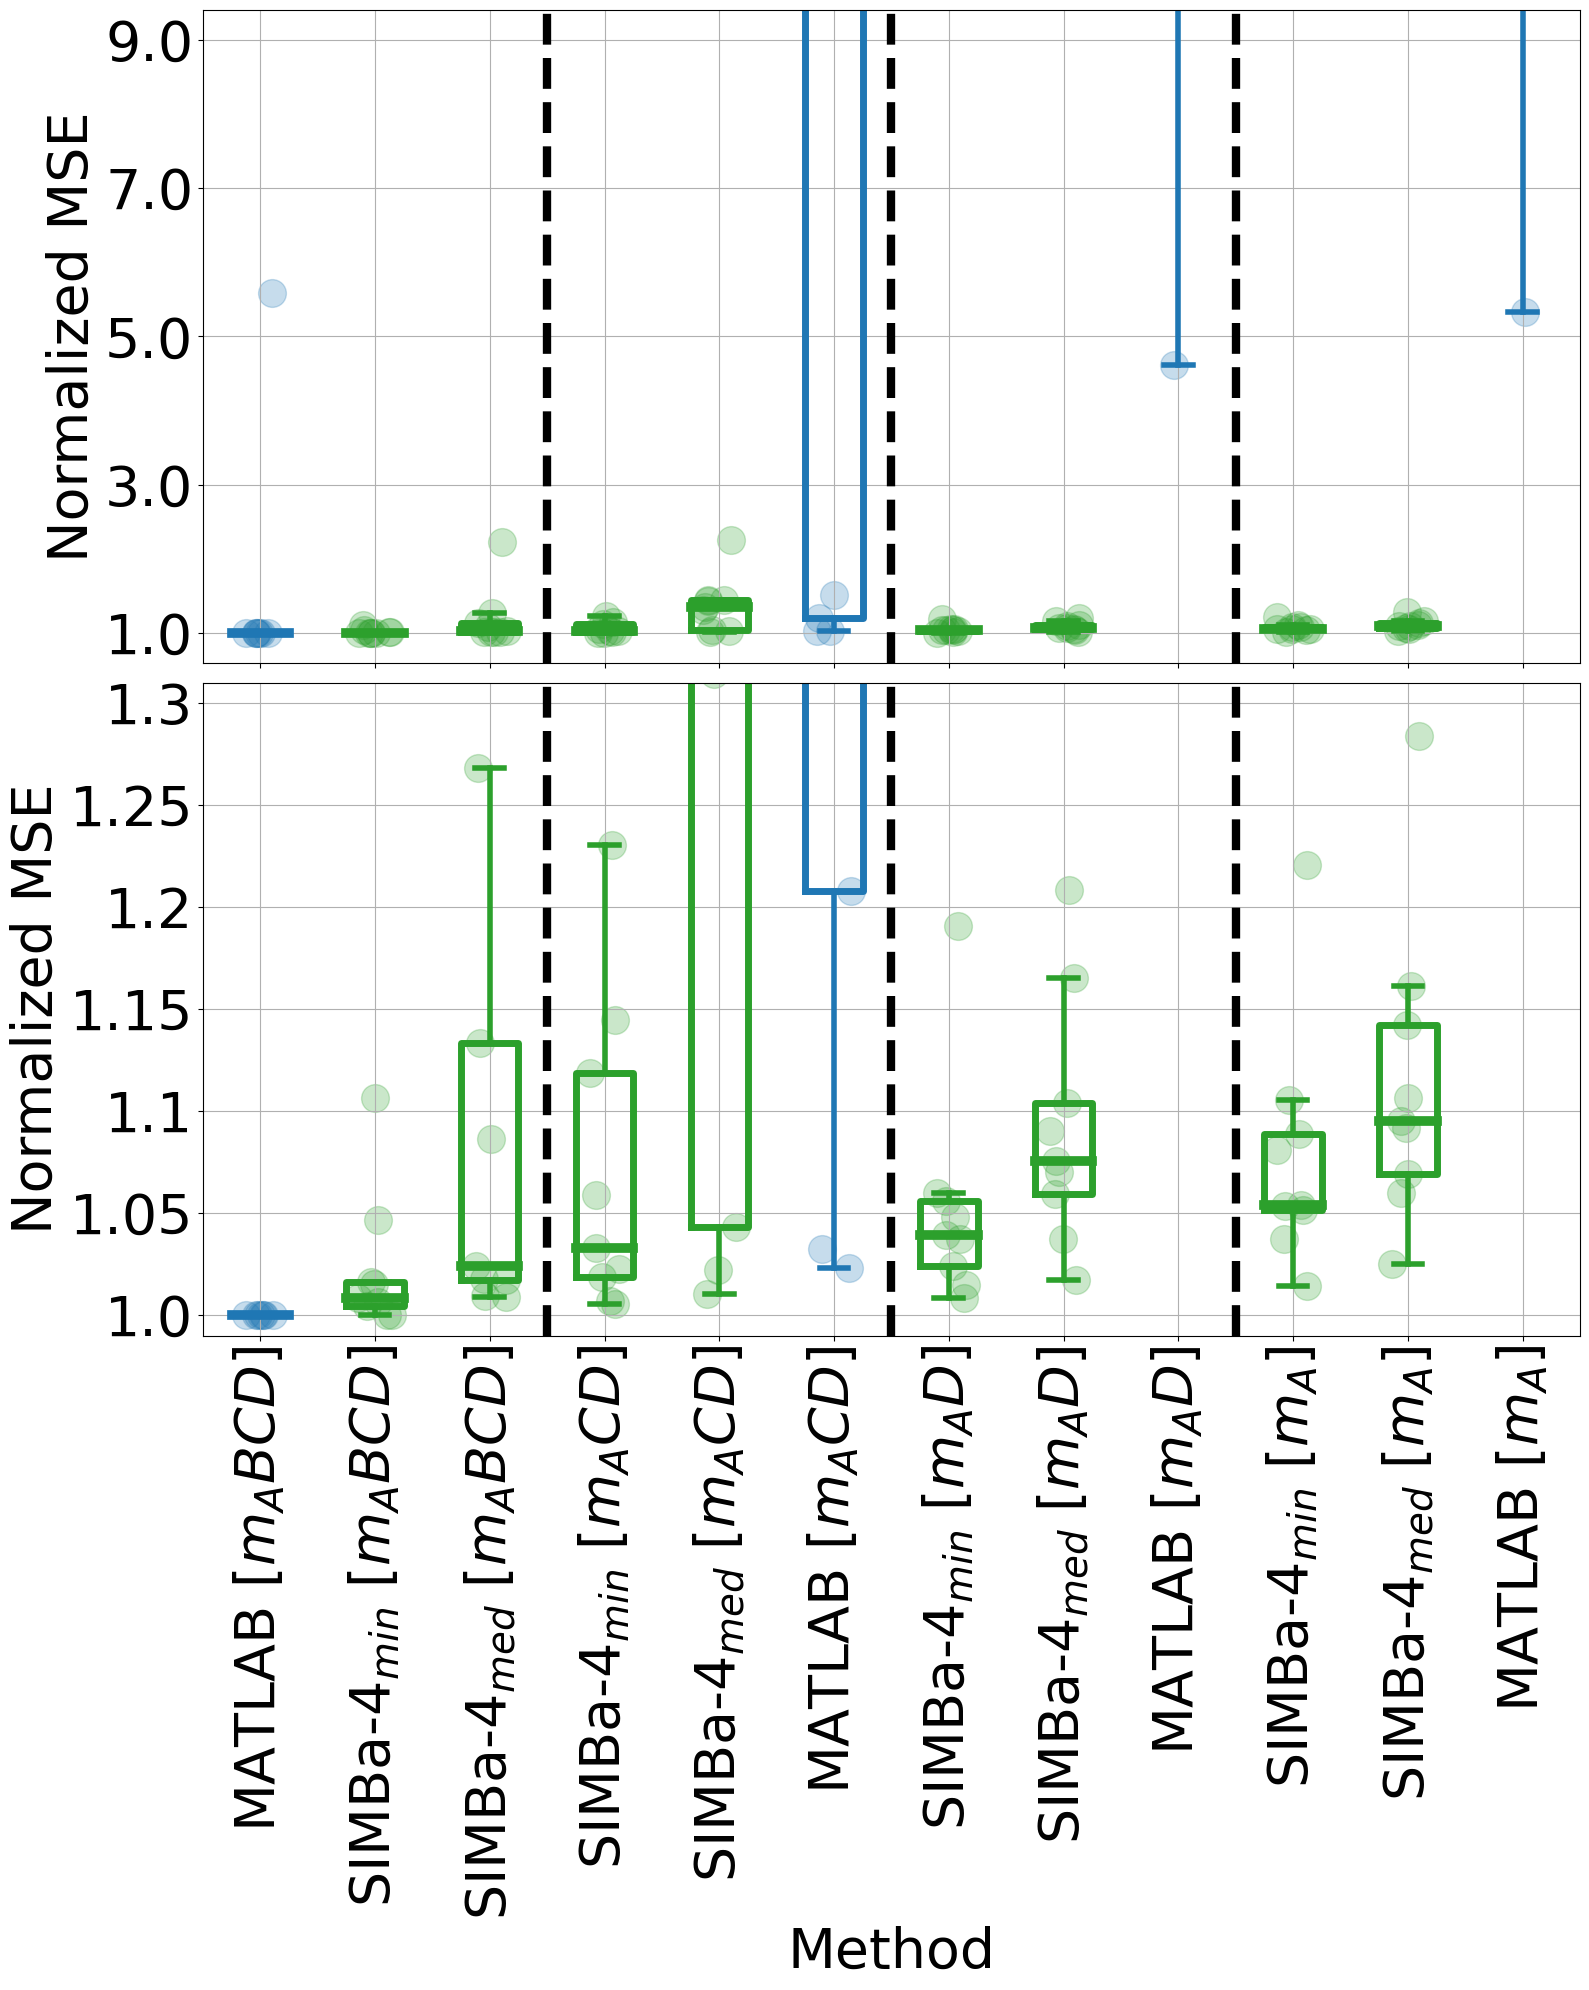

In [ ]:
names = [
 '20SIMBa-4$_{med}$ [$m_A$]',
 '19SIMBa-4$_{min}$ [$m_A$]',
 '17SIMBa-4$_{med}$ [$m_AD$]',
 '16SIMBa-4$_{min}$ [$m_AD$]',
 '14SIMBa-4$_{med}$ [$m_ACD$]',
 '13SIMBa-4$_{min}$ [$m_ACD$]',
 '12SIMBa-4$_{med}$ [$m_ABCD$]',
 '11SIMBa-4$_{min}$ [$m_ABCD$]',
 '21MATLAB [$m_A$]',
 '18MATLAB [$m_AD$]',
 '15MATLAB [$m_ACD$]',
 '10MATLAB [$m_ABCD$]']

def plot_structure(names, mses, ylim=[3.], grid=[0.25], savename=None, scale=2):

    all_mses = np.concatenate(mses, axis=1)
    if len(all_mses) != len(names):
        all_mses = all_mses.T
        
    all_mses = all_mses / all_mses.min(axis=0)
    mses = {name: all_mses[i,:] for i, name in enumerate(names)}
    mses = sorted(mses.items(), key=lambda x:x[0])
    

    if not isinstance(ylim, list):
        ylim = [ylim]
    if not isinstance(grid, list):
        grid = [grid]

    fig, ax = plt.subplots(len(ylim),1,figsize=(16,8*len(ylim)+4), sharex=True)   
    if len(ylim) == 1:
        ax = [ax]
    print('Method\t\t&\tQ1\t&\tMedian\t&\tQ3') 
    for m in range(len(ylim)):
        for i in range(len(mses)):
            if m == 0:
                if len(mses[i][0]) < 8:
                    print(f'{mses[i][0]}\t\t&\t{np.quantile(mses[i][1], q=0.25):.2f}\t&\t{np.median(mses[i][1]):.2f}\t&\t{np.quantile(mses[i][1], q=0.75):.2f}\t\\\\')
                else:
                    print(f'{mses[i][0]}\t&\t{np.quantile(mses[i][1], q=0.25):.2f}\t&\t{np.median(mses[i][1]):.2f}\t&\t{np.quantile(mses[i][1], q=0.75):.2f}\t\\\\')
            ticks = list(np.array([i+1]*all_mses.shape[1]) + (np.random.rand(all_mses.shape[1])*0.3 - 0.15))
            c = 'tab:green' if 'SIMBa' in mses[i][0] else 'tab:blue' 
            ax[m].scatter(ticks, mses[i][1], s=200*scale, alpha=0.25, c=c)
            ax[m].boxplot(mses[i][1], positions=[i+1], sym='', widths=0.5, 
                        boxprops=dict(color=c, lw=2.5*scale), medianprops=dict(color=c, lw=3.5*scale),
                        whiskerprops=dict(color=c, lw=2*scale), capprops=dict(color=c, lw=2*scale))#, patch_artist=True, boxprops=dict(color=c))
        ax[m].set_xticks(np.arange(len(mses))+1)
        ax[m].set_xticklabels([x[0][2:] for x in mses], rotation = 90, size=20*scale)
        ax[m].vlines([3.5,6.5,9.5], 1-grid[m]/5, ylim[m]+grid[m]/5, color='black', ls='--', lw=3*scale, clip_on=False)
        ax[m].set_yticks(np.arange((ylim[m]-1) * (1/grid[m]) + 1)*grid[m]+1)
        ax[m].set_yticklabels(ax[m].get_yticks(), size=20*scale)
        ax[m].set_ylim(1-grid[m]/5, ylim[m]+grid[m]/5)
        ax[m].set_ylabel('Normalized MSE', size=20*scale)
        ax[m].grid()
    ax[-1].set_xlabel('Method', size=20*scale)
    fig.tight_layout()
    if savename is not None:
        fig.savefig(f'figures/{savename}.pdf', format='pdf')
    plt.show()

plot_structure(names, all_mses_test_1, savename='matlab_structured_A', ylim=[9, 1.3], grid=[2, 0.05])

In [ ]:
directory = 'saves'
seeds = [1, 12, 123, 1234, 12345, 1234567, 12345678, 123456789, 1234567890]
all_names = ['Structure']
scale = 2

eng = matlab.engine.start_matlab()
eng.cd('mat', nargout=0)

all_mses_val = []
all_mses_test = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for name in all_names:
        mses_val = []
        mses_test = []
        for seed in seeds:
            path = os.path.join(f'{name}_{seed}', 'Results')
            names, times, train_ids, validation_ids, test_ids, data, sim_params, data_params = load_results(directory, path)
            mses_val_ = [np.mean((validation_id - data[7])**2) for validation_id in validation_ids]
            mses_test_ = [np.mean((test_id - data[8])**2) for test_id in test_ids]
            data1 = data[8]

            path = os.path.join(f'Mask_naive_{seed}', f'Results')
            names, times_, train_ids, validation_ids, test_ids, data, sim_params, data_params = load_results(directory, path)
            print([np.mean((validation_id - data[7])**2) for validation_id in validation_ids[11:]])
            mses_val_.append(np.median([np.mean((validation_id - data[7])**2) for validation_id in validation_ids[11:]]))
            mses_val_.append(np.min([np.mean((validation_id - data[7])**2) for validation_id in validation_ids[11:]]))
            mses_test_.append(np.median([np.mean((test_id - data[8])**2) for test_id in test_ids[11:]]))
            mses_test_.append(np.min([np.mean((test_id - data[8])**2) for test_id in test_ids[11:]]))
            data2 = data[8]
                        
            path = os.path.join(f'{name}_{seed}', 'Results-mat')
            _, _, train_ids, validation_ids, test_ids, data, sim_params, data_params = load_results(directory, path)
            #names += ['mat-N4SID', 'mat-PEM']
            #mses_val_ += [np.mean((validation_id - data[7])**2) for validation_id in validation_ids[-2:]]
            #mses_test_ += [np.mean((test_id - data[8])**2) for test_id in test_ids[-2:]]
            #data3 = data[8]

            A, B, C, D, N, id_D = data_params
            mask_A = ~(A == 0)*1.
            mask_B = ~(B == 0)*1.
            mask_C = ~(C == 0)*1.
            mask_D = ~(D == 0)*1.
            U, U_val, U_test, X, X_val, X_test, Y, Y_val, Y_test, x0, x0_val, x0_test = data
            ny = Y.shape[-1]

            assert np.allclose(data1, data2)
            #assert np.allclose(data1, data3)

            m_times, m_train, m_val, m_test = matlab_structure(eng, A, B, C, D, mask_A, mask_B, mask_C, mask_D, U, U_val, U_test, Y, Y_val, Y_test, stable_A=True)
            mses_val_ += [np.mean((validation_id - data[7])**2) for validation_id in m_val]
            mses_test_ += [np.mean((test_id - data[8])**2) for test_id in m_test]
            print(len(mses_test_))

            mses_val.append(mses_val_)
            mses_test.append(mses_test_)

        all_mses_val.append(np.array(mses_val).T)
        all_mses_test.append(np.array(mses_test).T)

eng.quit() 

[0.1066649978095015, 0.10724833633527792, 0.09690292607225288, 0.0978805991819475, 0.0970454748088427, 0.0980343753940833, 0.09768216185760208, 0.09776329725506677]
28
[1.5075065313884395, 1.5087827147708655, 0.495083585800149, 0.7649525378874261, 1.5085824620559616, 0.4959816041533867, 1.509143995789313, 0.49493504549944284]
28
[0.3842902693144181, 0.38453237971951537, 0.38469201766389555, 0.3843640643946587, 0.3844011433932044, 0.3842593112993744, 0.38477823159751645, 0.384584951848619]
28
[0.191825673009149, 0.1911721841732023, 0.565385957748742, 0.1883988639722879, 0.19135267261778965, 0.1891618143030412, 0.19158776746242825, 0.5935248020561683]
28
[0.14307112024053978, 0.20784563905464573, 0.14648283334089646, 0.14174499019556372, 0.2058859377211751, 0.14107383584573732, 0.14334424705720708, 0.2163277951031766]
28
[0.21025548171606562, 0.21031837946325257, 0.21022337529482094, 0.21026786031210712, 0.21032295062745074, 0.2103807520429872, 0.21625620809933907, 0.21041563864286164]
2

['24SIMBa', '22SIMBa-1 [$m_D$]', '20SIMBa-1 [$m_CD$]', '18SIMBa-1  [$CD$]', '16SIMBa-1 [$m_BCD$]', '14SIMBa-1  [$BCD$]', '13SIMBa-3 [$m_ABCD$]', '12SIMBa-4$_{med}$ [$m_ABCD$]', '11SIMBa-4$_{min}$ [$m_ABCD$]', '25MATLAB', '23MATLAB [$m_D$]', '21MATLAB [$m_CD$]', '19MATLAB  [$CD$]', '17MATLAB [$m_BCD$]', '15MATLAB  [$BCD$]', '10MATLAB [$m_ABCD$]']
Method		&	Q1	&	Median	&	Q3
10MATLAB [$m_ABCD$]	&	1.00	&	1.00	&	1.01	\\
11SIMBa-4$_{min}$ [$m_ABCD$]	&	1.00	&	1.01	&	1.02	\\
12SIMBa-4$_{med}$ [$m_ABCD$]	&	1.02	&	1.02	&	1.13	\\
13SIMBa-3 [$m_ABCD$]	&	1.27	&	5.97	&	9.35	\\
14SIMBa-1  [$BCD$]	&	1.00	&	1.02	&	1.04	\\
15MATLAB  [$BCD$]	&	1.03	&	1.37	&	3.00	\\
16SIMBa-1 [$m_BCD$]	&	1.05	&	1.19	&	1.40	\\
17MATLAB [$m_BCD$]	&	23.17	&	101.12	&	179.36	\\
18SIMBa-1  [$CD$]	&	1.04	&	1.07	&	1.08	\\
19MATLAB  [$CD$]	&	1.03	&	2.55	&	17.85	\\
20SIMBa-1 [$m_CD$]	&	1.03	&	1.06	&	1.11	\\
21MATLAB [$m_CD$]	&	1.03	&	2.59	&	42.87	\\
22SIMBa-1 [$m_D$]	&	1.04	&	1.05	&	1.12	\\
23MATLAB [$m_D$]	&	1.04	&	1.07	&	1.24	\\


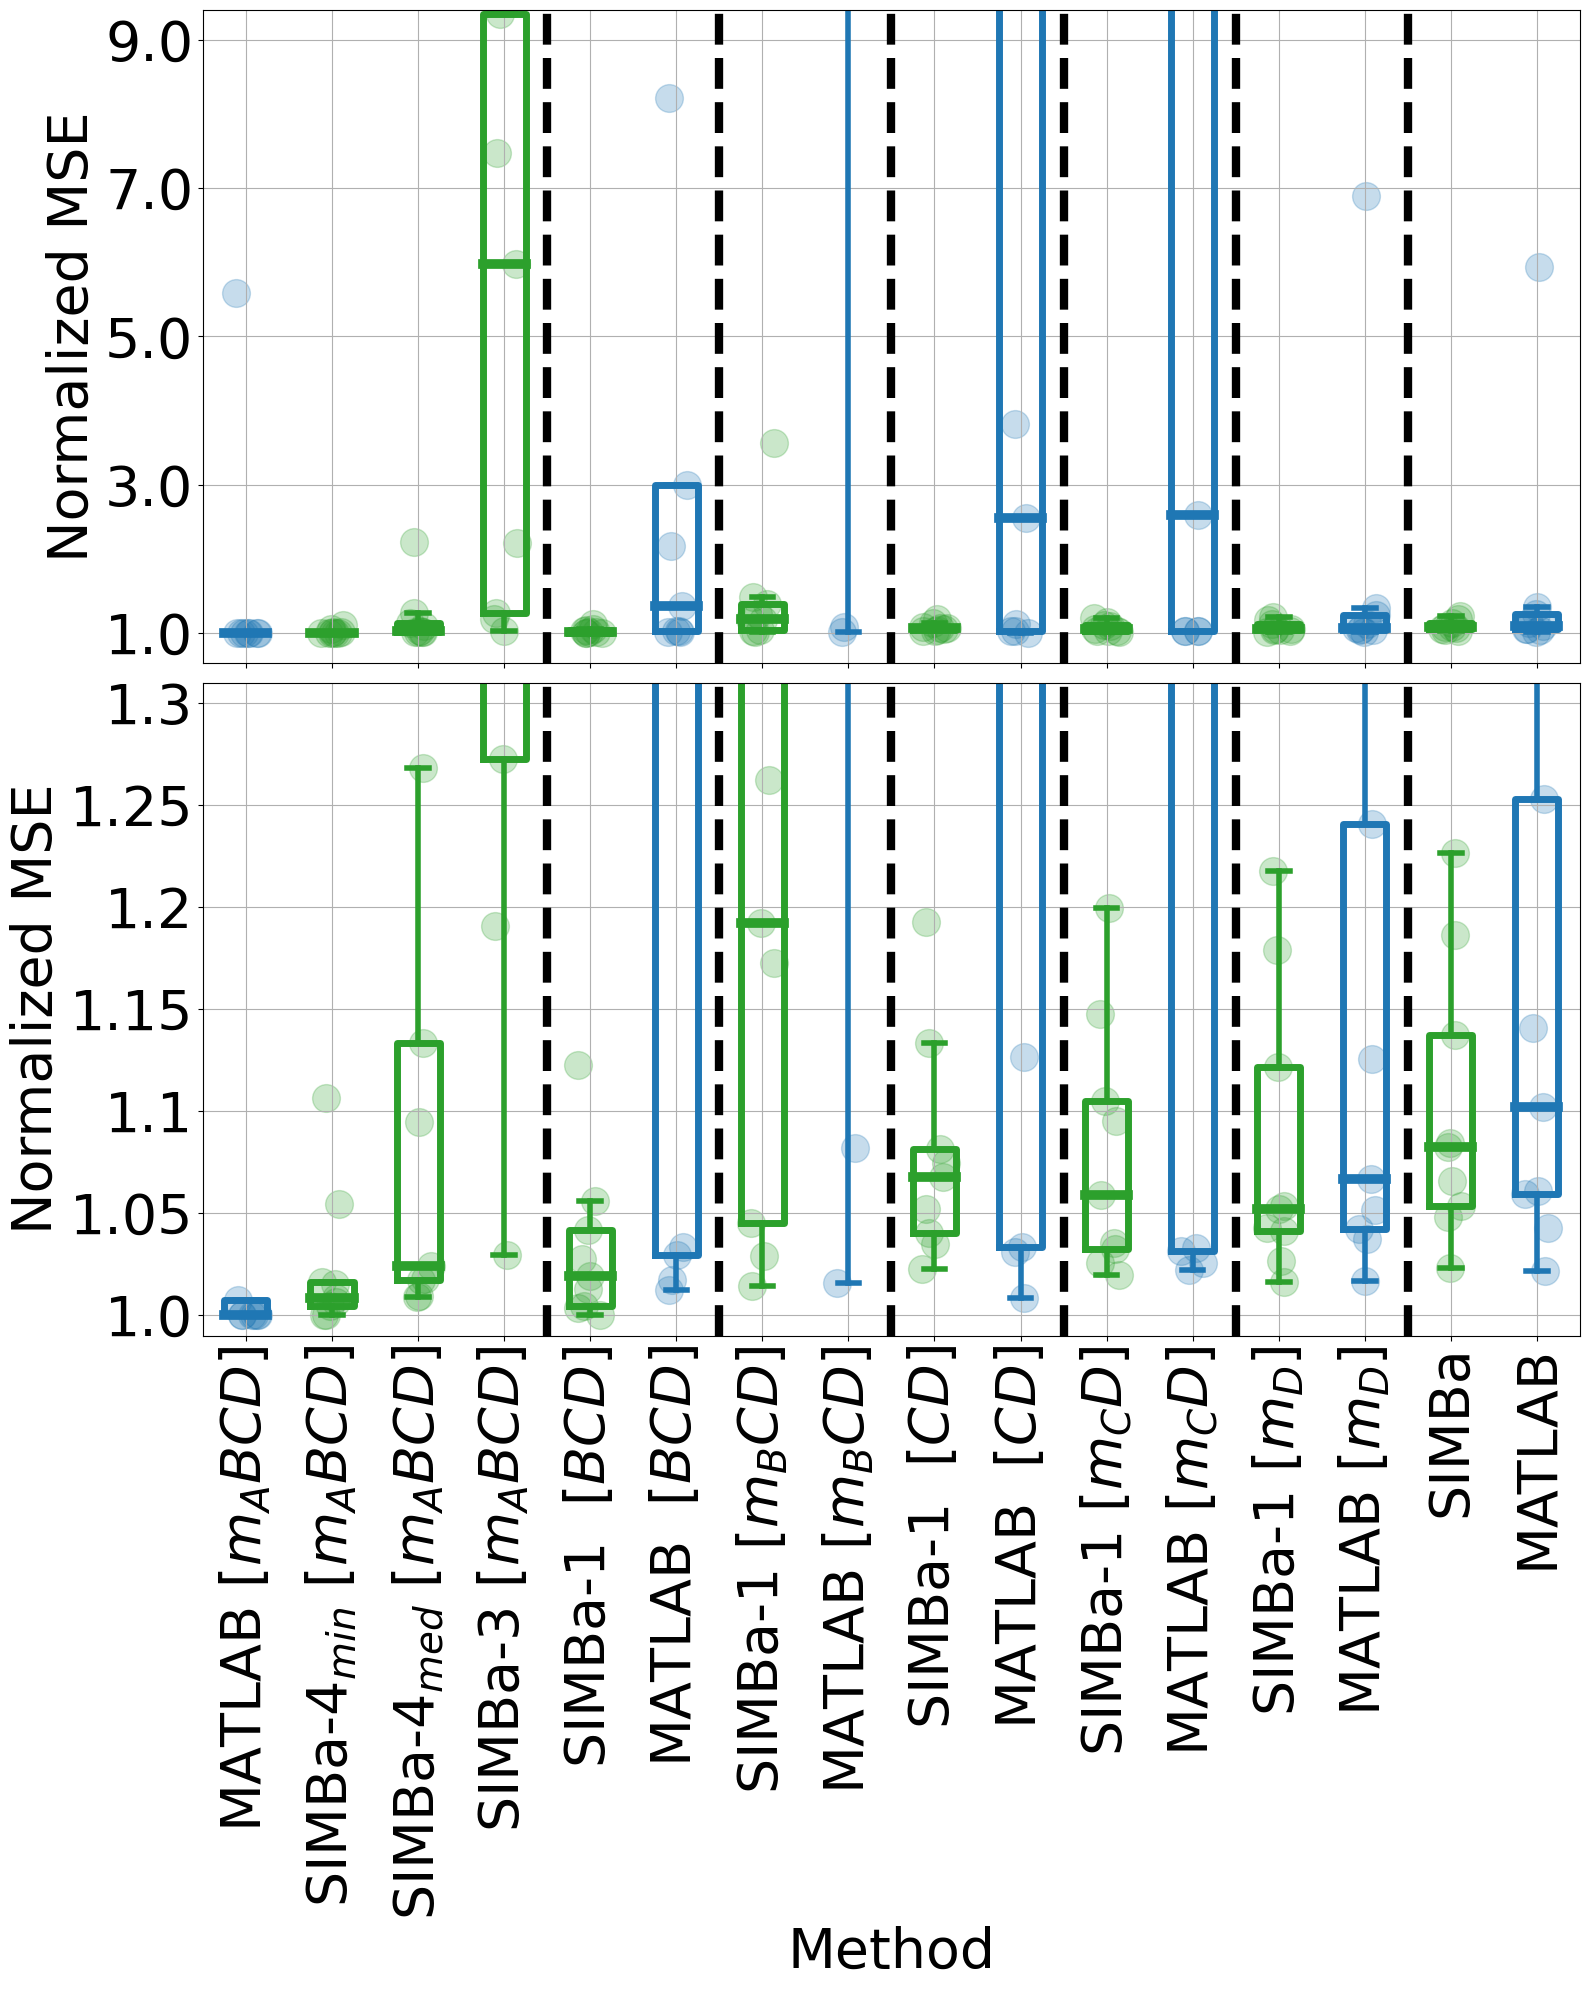

In [ ]:
names = ['ARMAX-ILLS',
 'ARMAX-RLLS',
 'ARX-ILLS',
 'ARX-RLLS',
 'OE-ILLS',
 'N4SID',
 'MOESP',
 'CVA',
 'PARSIM-K',
 'PARSIM-S',
 'PARSIM-P',
 '24SIMBa',
 '22SIMBa-1 [$m_D$]',
 '20SIMBa-1 [$m_CD$]',
 '18SIMBa-1  [$CD$]',
 '16SIMBa-1 [$m_BCD$]',
 '14SIMBa-1  [$BCD$]',
 '13SIMBa-3 [$m_ABCD$]',
 '12SIMBa-4$_{med}$ [$m_ABCD$]',
 '11SIMBa-4$_{min}$ [$m_ABCD$]',
 #'26MATLAB-N4SID',
 #'25MATLAB-PEM',
 '25MATLAB',
 '23MATLAB [$m_D$]',
 'mat-D',
 '21MATLAB [$m_CD$]',
 '19MATLAB  [$CD$]',
 '17MATLAB [$m_BCD$]',
 '15MATLAB  [$BCD$]',
 '10MATLAB [$m_ABCD$]']

def plot_structure(names, mses, ylim=[3.], grid=[0.25], savename=None, scale=2):

    ind = list(np.arange(-17,-6)) + list(np.arange(-5,0))
    names = names[-17:-6] + names[-5:]
    mses = [mses[0][ind]] 
    print(names)
    all_mses = np.concatenate(mses, axis=1)
    if len(all_mses) != len(names):
        all_mses = all_mses.T
        
    all_mses = all_mses / all_mses.min(axis=0)
    mses = {name: all_mses[i,:] for i, name in enumerate(names)}
    mses = sorted(mses.items(), key=lambda x:x[0])
    

    if not isinstance(ylim, list):
        ylim = [ylim]
    if not isinstance(grid, list):
        grid = [grid]

    fig, ax = plt.subplots(len(ylim),1,figsize=(16,8*len(ylim)+4), sharex=True)   
    if len(ylim) == 1:
        ax = [ax]
    print('Method\t\t&\tQ1\t&\tMedian\t&\tQ3') 
    for m in range(len(ylim)):
        for i in range(len(mses)):
            if m == 0:
                if len(mses[i][0]) < 8:
                    print(f'{mses[i][0]}\t\t&\t{np.quantile(mses[i][1], q=0.25):.2f}\t&\t{np.median(mses[i][1]):.2f}\t&\t{np.quantile(mses[i][1], q=0.75):.2f}\t\\\\')
                else:
                    print(f'{mses[i][0]}\t&\t{np.quantile(mses[i][1], q=0.25):.2f}\t&\t{np.median(mses[i][1]):.2f}\t&\t{np.quantile(mses[i][1], q=0.75):.2f}\t\\\\')
            ticks = list(np.array([i+1]*all_mses.shape[1]) + (np.random.rand(all_mses.shape[1])*0.3 - 0.15))
            c = 'tab:green' if 'SIMBa' in mses[i][0] else 'tab:blue' 
            ax[m].scatter(ticks, mses[i][1], s=200*scale, alpha=0.25, c=c)
            ax[m].boxplot(mses[i][1], positions=[i+1], sym='', widths=0.5, 
                        boxprops=dict(color=c, lw=2.5*scale), medianprops=dict(color=c, lw=3.5*scale),
                        whiskerprops=dict(color=c, lw=2*scale), capprops=dict(color=c, lw=2*scale))#, patch_artist=True, boxprops=dict(color=c))
        ax[m].set_xticks(np.arange(len(mses))+1)
        ax[m].set_xticklabels([x[0][2:] for x in mses], rotation = 90, size=20*scale)
        ax[m].vlines([4.5,6.5,8.5,10.5,12.5,14.5], 1-grid[m]/5, ylim[m]+grid[m]/5, color='black', ls='--', lw=3*scale, clip_on=False)
        ax[m].set_yticks(np.arange((ylim[m]-1) * (1/grid[m]) + 1)*grid[m]+1)
        ax[m].set_yticklabels(ax[m].get_yticks(), size=20*scale)
        ax[m].set_ylim(1-grid[m]/5, ylim[m]+grid[m]/5)
        ax[m].set_ylabel('Normalized MSE', size=20*scale)
        ax[m].grid()
    ax[-1].set_xlabel('Method', size=20*scale)
    fig.tight_layout()
    if savename is not None:
        fig.savefig(f'figures/{savename}.pdf', format='pdf')
    plt.show()

plot_structure(names, all_mses_test, savename='matlab_structured', ylim=[9, 1.3], grid=[2, 0.05])

In [ ]:
import pandas as pd
directory = 'saves'
seeds = [1, 12, 123, 1234, 12345, 1234567, 12345678, 123456789, 1234567890]
all_names = ['Structure']
scale = 2

eng = matlab.engine.start_matlab()
eng.cd('mat', nargout=0)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for name in all_names:

        path = os.path.join(f'{name}_{seed}', 'Results')
        names, times, train_ids, validation_ids, test_ids, data, sim_params, data_params = load_results(directory, path)

        names += ['SIMBa-4 [$m_ABCD$]', 'MATLAB', 'MATLAB [$m_D$]', 'mat-D', 'MATLAB [$m_CD$]', 'MATLAB  [$CD$]', 
                  'MATLAB [$m_BCD$]', 'MATLAB  [$BCD$]', 'MATLAB [$m_ABCD$]']
        
        ts = pd.DataFrame(index=names, columns=[1,2,3,4,5,6,7,8,9])

        for i,seed in enumerate(seeds):
            path = os.path.join(f'{name}_{seed}', 'Results')
            names, times, train_ids, validation_ids, test_ids, data, sim_params, data_params = load_results(directory, path)
            ts.iloc[:18, i] = times

            path = os.path.join(f'Mask_naive_{seed}', f'Results')
            names, times_, train_ids, validation_ids, test_ids, data, sim_params, data_params = load_results(directory, path)
            ts.iloc[18, i] = np.median(times[11:])

            path = os.path.join(f'{name}_{seed}', 'Results-mat')
            _, _, train_ids, validation_ids, test_ids, data, sim_params, data_params = load_results(directory, path)
            #names += ['mat-N4SID', 'mat-PEM']
            #mses_val_ += [np.mean((validation_id - data[7])**2) for validation_id in validation_ids[-2:]]
            #mses_test_ += [np.mean((test_id - data[8])**2) for test_id in test_ids[-2:]]
            #data3 = data[8]

            A, B, C, D, N, id_D = data_params
            mask_A = ~(A == 0)*1.
            mask_B = ~(B == 0)*1.
            mask_C = ~(C == 0)*1.
            mask_D = ~(D == 0)*1.
            U, U_val, U_test, X, X_val, X_test, Y, Y_val, Y_test, x0, x0_val, x0_test = data
            ny = Y.shape[-1]

            assert np.allclose(data1, data2)
            #assert np.allclose(data1, data3)

            m_times, m_train, m_val, m_test = matlab_structure(eng, A, B, C, D, mask_A, mask_B, mask_C, mask_D, U, U_val, U_test, Y, Y_val, Y_test, stable_A=True)
            ts.iloc[19:, i] = m_times

        ts = ts.iloc[5:]
        display(ts)
        mean = ts.mean(axis=1)
        std = ts.std(axis=1)

        for i in range(len(mean)):
            if mean[i] < 10:
                print(f'{mean.index[i]}\t&\t{mean[i]:.2f}\t&\t{std[i]:.2f}\t\\\\')
            else:
                print(f'{mean.index[i]}\t&\t{int(mean[i])}\t&\t{int(std[i])}\t\\\\')

eng.quit() 


,1,2,3,4,5,6,7,8,9
N4SID,0.261414,0.238752,0.172765,0.219092,0.248023,0.140605,0.198835,0.468516,0.268029
MOESP,0.349381,0.303044,0.453941,0.232777,0.224722,0.233903,0.188545,0.576009,0.298499
CVA,0.694543,0.481803,0.30554,0.405515,0.52075,0.418073,0.653021,0.777835,0.57349
PARSIM-K,1.305815,1.357778,1.303484,1.325972,1.368104,1.599616,1.618777,1.658014,1.535132
PARSIM-S,0.893333,1.023549,1.09162,1.008104,1.00264,1.360077,1.234427,1.379202,1.086631
PARSIM-P,7.405996,3.86073,10.590421,5.887455,15.111966,5.706058,8.180446,8.376141,8.474591
SIMBa,3750.765379,3821.96866,3630.366296,3745.712868,3588.551055,3628.771037,3812.848417,3698.43128,3885.30244
SIMBa_mD,3779.484047,3712.241163,3655.168652,3704.766027,3564.808912,3704.040353,3789.861348,3636.398106,3870.746967
SIMBa_mC,3526.322556,3498.269434,3405.265411,3482.052692,3407.243675,3513.286345,3622.94308,3483.764958,3672.299615
SIMBa_C,3372.722043,3379.289324,3329.08911,3353.575929,3271.984154,3360.710515,3505.433998,3341.757477,3582.207128


N4SID	&	0.25	&	0.09	\\
MOESP	&	0.32	&	0.13	\\
CVA	&	0.54	&	0.15	\\
PARSIM-K	&	1.45	&	0.15	\\
PARSIM-S	&	1.12	&	0.17	\\
PARSIM-P	&	8.18	&	3.25	\\
SIMBa	&	3729	&	100	\\
SIMBa_mD	&	3713	&	91	\\
SIMBa_mC	&	3512	&	88	\\
SIMBa_C	&	3388	&	95	\\
SIMBa_CmB	&	3671	&	62	\\
SIMBa_CB	&	3130	&	73	\\
SIMBa_CBmA	&	3100	&	65	\\
SIMBa-4 [$m_ABCD$]	&	3512	&	88	\\
MATLAB	&	1.53	&	0.70	\\
MATLAB [$m_D$]	&	0.94	&	0.06	\\
mat-D	&	0.91	&	0.17	\\
MATLAB [$m_CD$]	&	0.91	&	0.19	\\
MATLAB  [$CD$]	&	0.84	&	0.25	\\
MATLAB [$m_BCD$]	&	0.88	&	0.34	\\
MATLAB  [$BCD$]	&	0.55	&	0.12	\\
MATLAB [$m_ABCD$]	&	0.28	&	0.13	\\


In [ ]:
for i in range(len(mean)):
        if mean[i] < 10:
            print(f'{mean.index[i]}\t&\t{mean[i]:.2f}\t&\t{std[i]:.2f}\t\\\\')
        else:
            print(f'{mean.index[i]}\t&\t{int(mean[i])}\t&\t{int(std[i])}\t\\\\')

['ARMAX-ILLS',
 'ARMAX-RLLS',
 'ARX-ILLS',
 'ARX-RLLS',
 'OE-ILLS',
 'N4SID',
 'MOESP',
 'CVA',
 'PARSIM-K',
 'PARSIM-S',
 'PARSIM-P',
 'SIMBa_CBmA_0',
 'SIMBa_CBmA_1',
 'SIMBa_CBmA_2',
 'SIMBa_CBmA_3',
 'SIMBa_CBmA_4',
 'SIMBa_CBmA_5',
 'SIMBa_CBmA_6',
 'SIMBa_CBmA_7']